In [1]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC

np.random.seed(0)

import os
os.add_dll_directory('C:\Aorda\PSG\lib')
import psgpython as psg
from psgutilities import *

In [2]:
# Define coordinates for the vertices of the triangle
vertices = np.array([[-4, 0], [4, 0], [0, 6]])

# Class -1: Generate data points in the first cluster (triangle vertex 1)
mean_class_minus = vertices[0]
cov_class_minus = [[1, 0], [0, 1]]
class_minus = np.random.multivariate_normal(mean_class_minus, cov_class_minus, 250)

# Class 0: Generate data points in the second cluster (triangle vertex 2)
mean_class_zero = vertices[1]
cov_class_zero = [[1, 0], [0, 1]]
class_zero = np.random.multivariate_normal(mean_class_zero, cov_class_zero, 250)

# Class +1: Generate data points in the third cluster (triangle vertex 3)
mean_class_plus = vertices[2]
cov_class_plus = [[1, 0], [0, 1]]
class_plus = np.random.multivariate_normal(mean_class_plus, cov_class_plus, 250)

# Combine the three clusters and shuffle
X1 = np.vstack((class_minus, class_zero, class_plus))
# y = np.hstack((np.ones(250, dtype=int) * -1, np.zeros(250, dtype=int), np.ones(250, dtype=int)))

# Define the equation of the line for the hyperplane (e.g., y = mx + c)
# Here, let's use a line with a positive slope
m = 2  # Slope of the line
c = -1    # Intercept

# Calculate the y-coordinate of each point on the line
y1_hyperplane = m * X1[:, 0] + c

# Assign labels based on whether the point is above or below the line
y1 = np.where(X1[:, 1] > y1_hyperplane, 1, -1)

# Shuffle the dataset
shuffle_idx = np.arange(len(X1))
np.random.shuffle(shuffle_idx)
X1 = X1[shuffle_idx]
y1 = y1[shuffle_idx]


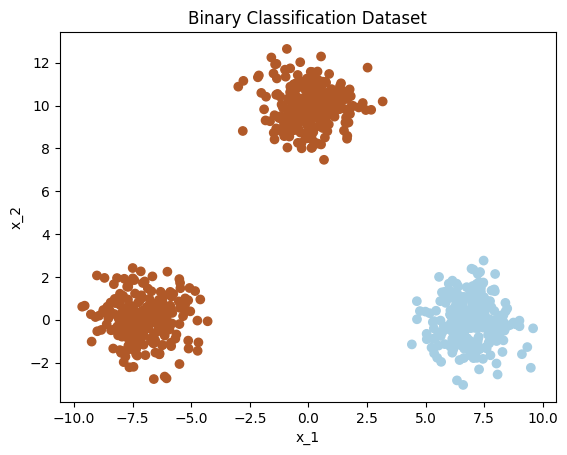

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap=plt.cm.Paired)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Binary Classification Dataset')
plt.show()

In [3]:


# Define coordinates for the vertices of the triangle
vertices = np.array([[-4, 0], [4, 0], [0, 6]])

# Class -1: Generate data points in the first cluster (triangle vertex 1)
mean_class_minus = vertices[0]
cov_class_minus = [[1, 0], [0, 1]]
class_minus = np.random.multivariate_normal(mean_class_minus, cov_class_minus, 250)

# Class 0: Generate data points in the second cluster (triangle vertex 2)
mean_class_zero = vertices[1]
cov_class_zero = [[1, 0], [0, 1]]
class_zero = np.random.multivariate_normal(mean_class_zero, cov_class_zero, 250)

# Class +1: Generate data points in the third cluster (triangle vertex 3)
mean_class_plus = vertices[2]
cov_class_plus = [[1, 0], [0, 1]]
class_plus = np.random.multivariate_normal(mean_class_plus, cov_class_plus, 250)

# Combine the three clusters and shuffle
X2 = np.vstack((class_minus, class_zero, class_plus))
# y = np.hstack((np.ones(250, dtype=int) * -1, np.zeros(250, dtype=int), np.ones(250, dtype=int)))

# Define the equation of the line for the hyperplane (e.g., y = mx + c)
# Here, let's use a line with a positive slope
m = -1.4  # Slope of the line
c = 0.8   # Intercept

# Calculate the y-coordinate of each point on the line
y2_hyperplane = m * X2[:, 0] + c

# Assign labels based on whether the point is above or below the line
y2 = np.where(X2[:, 1] > y2_hyperplane, 1, -1)

# Shuffle the dataset
shuffle_idx = np.arange(len(X2))
np.random.shuffle(shuffle_idx)
X2 = X2[shuffle_idx]
y2 = y2[shuffle_idx]


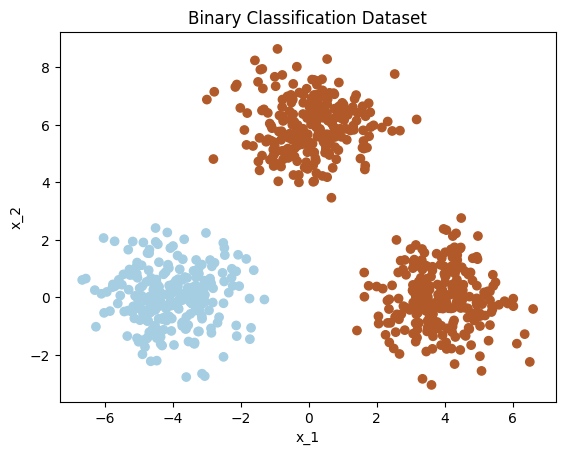

In [44]:
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap=plt.cm.Paired)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Binary Classification Dataset')
plt.show()

In [2]:
def gen_data():
  # Define coordinates for the vertices of the triangle
  vertices = np.array([[-10, 0], [10, 0], [0, 20]])

  # Class -1: Generate data points in the first cluster (triangle vertex 1)
  mean_class_minus = vertices[0]
  cov_class_minus = [[1, 0], [0, 1]]
  class_minus = np.random.multivariate_normal(mean_class_minus, cov_class_minus, 250)

  # Class 0: Generate data points in the second cluster (triangle vertex 2)
  mean_class_zero = vertices[1]
  cov_class_zero = [[1, 0], [0, 1]]
  class_zero = np.random.multivariate_normal(mean_class_zero, cov_class_zero, 250)

  # Class +1: Generate data points in the third cluster (triangle vertex 3)
  mean_class_plus = vertices[2]
  cov_class_plus = [[1, 0], [0, 1]]
  class_plus = np.random.multivariate_normal(mean_class_plus, cov_class_plus, 250)

  # Combine the three clusters and shuffle
  X1 = np.vstack((class_minus, class_zero, class_plus))
  # Assign labels: 0 and 2 as -1, 1 as +1
  y1 = np.where(np.isin(X1, class_minus).all(axis=1) | np.isin(X1, class_plus).all(axis=1), -1, 1)

  # Shuffle the dataset
  shuffle_idx = np.arange(len(X1))
  np.random.shuffle(shuffle_idx)
  X1 = X1[shuffle_idx]
  y1 = y1[shuffle_idx]

  # Create a separate dataset with modified labels
  X2 = np.vstack((class_minus, class_zero, class_plus))
  # Assign labels: 1 and 2 as +1, 0 as -1
  y2 = np.where(np.isin(X2, class_zero).all(axis=1) | np.isin(X2, class_plus).all(axis=1), 1, -1)

  # Shuffle the dataset
  shuffle_idx = np.arange(len(X2))
  np.random.shuffle(shuffle_idx)
  X2 = X2[shuffle_idx]
  y2 = y2[shuffle_idx]

  # Return the datasets
  return [X1, X2], [y1, y2]

In [3]:
DIMS = 2
a = np.array([1] * DIMS) # initial vector
epsilon = 0.1 # error allowance
x = np.array([0] * DIMS)

In [4]:
def min_bpoe(X, y, a, initial_w=None):
  y = [y[i] * a[i] for i in range(DIMS)]
  X = np.hstack((X[i] for i in range(DIMS)))
  extra_column = np.ones((len(X), DIMS))
  X = np.hstack((X, extra_column))

  cols_to_multiply1 = X[:, [0, 1, 4]]
  cols_to_multiply2 = X[:, [2, 3, 5]]

  result1 = cols_to_multiply1 * y[0].reshape(-1, 1)
  result2 = cols_to_multiply2 * y[1].reshape(-1, 1)

  bpoe_matrix_scenarios_body = np.hstack((result1, result2))

  bpoe_scenario_benchmark = np.array([a @ x] * len(X))
  bpoe_matrix_scenarios_body = np.column_stack((bpoe_matrix_scenarios_body, bpoe_scenario_benchmark))

  bpoe_header = ['w11', 'w12', 'b1', 'w21', 'w22', 'b2']
  bpoe_matrix_scenarios = [bpoe_header+['scenario_benchmark'], bpoe_matrix_scenarios_body]
  bpoe_matrix_quadratic1_body = np.asarray([[1, 0, 0, 0, 0, 0],
                                            [0, 1, 0, 0, 0, 0]])
  bpoe_matrix_quadratic2_body = np.asarray([[0, 0, 0, 1, 0, 0],
                                            [0, 0, 0, 0, 1, 0]])
  bpoe_matrix_quadratic1 = [bpoe_header, bpoe_matrix_quadratic1_body]
  bpoe_matrix_quadratic2 = [bpoe_header, bpoe_matrix_quadratic2_body]

  allowExternal = True
  suppressMessages = False
  bpoe_problem_name = "problem_classify"
  bpoe_problem_statement = f"minimize\n\
  bpoe({0},matrix_scenarios)\n\
  Constraint: <= 1\n\
  quadratic(matrix_quadratic1)\n\
  quadratic(matrix_quadratic2)\n\
  Box: >= -10, <= 10\n\
  Solver: VAN"
  bpoe_problem_dictionary = {'problem_name':bpoe_problem_name, 
                             'problem_statement':bpoe_problem_statement, 
                             'matrix_scenarios':bpoe_matrix_scenarios, 
                             'matrix_quadratic1':bpoe_matrix_quadratic1, 
                             'matrix_quadratic2':bpoe_matrix_quadratic2}
  if(initial_w is not None):
    bpoe_problem_statement = f"minimize\n\
    bpoe({0},matrix_scenarios)\n\
    Constraint: <= 1\n\
    quadratic(matrix_quadratic1)\n\
    quadratic(matrix_quadratic2)\n\
    Box: >= -10, <= 10\n\
    Solver: VAN, init_point = point_initial_w"
    bpoe_problem_dictionary['point_initial_w'] = [bpoe_header, initial_w]

  bpoe_res = psg.psg_solver(bpoe_problem_dictionary, allowExternal, suppressMessages)
  print(f"{bpoe_problem_name} Result:\n{bpoe_res}")
  print(f"{bpoe_problem_name} Optimal Point:\n{get_optimalpoint(bpoe_res)}")
  print(f"{bpoe_problem_name} Objective:\n{get_objective(bpoe_res)}")

  return (get_optimalpoint(bpoe_res), get_objective(bpoe_res))

In [5]:
def min_pm(X, y, w, initial_a=None):
  w11, w12, b1, w21, w22, b2 = w
  X1, X2 = X
  y1, y2 = y
  X1[:, 0] *= w11
  X1[:, 1] *= w12
  X1 = np.sum(X1, axis=1) + b1
  X1 = x[0] - (y1 * X1)
  X2[:, 0] *= w21
  X2[:, 1] *= w22
  X2 = np.sum(X2, axis=1) + b2
  X2 = x[1] - (y2 * X2)
  pm_matrix_scenarios_body = np.column_stack((X1, X2))
  pm_header = ['a1', 'a2']
  pm_matrix_scenarios = [pm_header, pm_matrix_scenarios_body]
  pm_matrix_linear_body = np.asarray([1, 1])
  pm_matrix_linear = [pm_header, pm_matrix_linear_body]

  allowExternal = True
  suppressMessages = False
  pm_problem_name = "problem_classify"
  pm_problem_statement = f"minimize\n\
  pm_pen({-1},matrix_scenarios)\n\
  Constraint: == 2\n\
  linear(matrix_linear)\n\
  Box: >= 0\n\
  Solver: VAN"
  pm_problem_dictionary = {'problem_name':pm_problem_name, 
                             'problem_statement':pm_problem_statement, 
                             'matrix_scenarios':pm_matrix_scenarios,
                             'matrix_linear':pm_matrix_linear}
  
  if(initial_a is not None):
    pm_problem_statement = f"minimize\n\
    pm_pen({-1},matrix_scenarios)\n\
    Constraint: == 2\n\
    linear(matrix_linear)\n\
    Box: >= 0\n\
    Solver: VAN, init_point = point_initial_a"
    pm_problem_dictionary['point_initial_a'] = [pm_header, initial_a]

  pm_res = psg.psg_solver(pm_problem_dictionary, allowExternal, suppressMessages)
  print(f"{pm_problem_name} Result:\n{pm_res}")
  print(f"{pm_problem_name} Optimal Point:\n{get_optimalpoint(pm_res)}")
  print(f"{pm_problem_name} Objective:\n{get_objective(pm_res)}")

  return (get_optimalpoint(pm_res), get_objective(pm_res))

  

In [46]:
X, y = gen_data()


Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.255356883663E+01  Residual=-.800000000000E+01
Ext.iteration=23  Objective=0.137975136631E+01  Residual=-.620427337646E+01
Start stage  1
Ext.iteration=0  Objective=0.402859109430E-13  Residual=-.620427337646E+01
Ext.iteration=37  Objective=-.167266427044E+02  Residual=-.273259957595E+03
Start stage  2
Ext.iteration=0  Objective=0.557474141873E-12  Residual=-.273259957595E+03
Ext.iteration=71  Objective=-.114819480743E+01  Residual=0.491591947593E-06
Start stage  3
Ext.iteration=0  Objective=0.541175909959E-12  Residual=0.491591947593E-06
Ext.iteration=75  Objective=-.400877565425E-01  Residual=-.171693683968E+00
Start stage  4
Ext.iteration=0  Objective=0.546010077876E-12  Residual=-.171693683968E+00
Ext.iteration=20 

C:\Users\jacob\AppData\Local\Temp\ipykernel_11108\3453442895.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.hstack((X[i] for i in range(DIMS)))


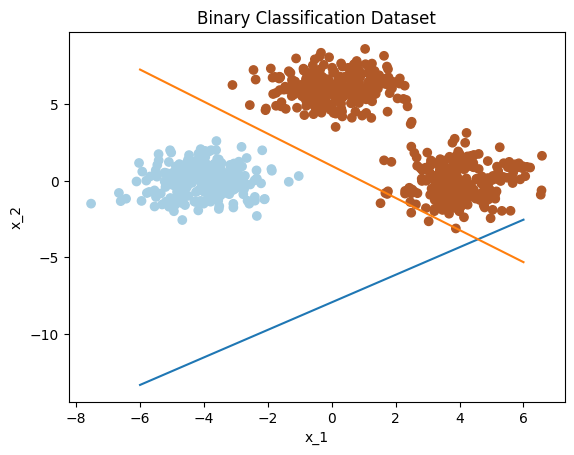

In [47]:
bpoe_opt_point, bpoe_obj = min_bpoe(np.copy(X), np.copy(y), a)
weights = bpoe_opt_point[1]
f1 = lambda x: (weights[2] - weights[0]*x)/weights[1]
f2 = lambda x: (weights[5] - weights[3]*x)/weights[4]
x_vals = np.linspace(-6, 6, 20)
y1_vals = f1(x_vals)
y2_vals = f2(x_vals)
plt.scatter(X[1][:, 0], X[1][:, 1], c=y[1], cmap=plt.cm.Paired)
plt.plot(x_vals, y1_vals)
plt.plot(x_vals, y2_vals)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Binary Classification Dataset')
plt.show()


In [12]:
pm_opt_point, pm_obj = min_pm(np.copy(X), np.copy(y), weights)

Running solver
Reading problem formulation
Asking for data information
Getting data
     50.0% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_linear was read
Start optimization
Ext.iteration=0  Objective=0.100000000000E+01  Residual=0.000000000000E+00
Ext.iteration=3  Objective=0.381131820921E+00  Residual=0.000000000000E+00
Optimization is stopped
Solution is optimal
Calculating resulting outputs. Writing solution.
Objective: objective = 0.381131820921 [0.00000000000]
Solver has normally finished. Solution was saved.
Problem: problem_1, solution_status = optimal
Timing: data_loading_time = 0.15, preprocessing_time = 0.01, solving_time = 0.01
Variables: optimal_point = point_problem_1
Objective: objective = 0.381131820921 [0.00000000000]
Constraint: constraint_1 =  2.000000000000E+00 [ 4.440892098501E-16]
Function: pm_pen(-1,matrix_scenarios) =  3.811318209215E-01
Function: linear(matrix_linear) =  2.000000000000E+00
OK. Solver Finished

problem_classify Res

In [6]:
def driver():
  X, y = gen_data()
  # step 2
  bpoe_opt_point, bpoe_obj = min_bpoe(np.copy(X), np.copy(y), a)
  w_tilda = bpoe_opt_point[1]
  # step 3
  pm_opt_point, pm_obj = min_pm(np.copy(X), np.copy(y), w_tilda)
  a_tilda = pm_opt_point[1]

  a1, a2 = a_tilda
  w11, w12, b1, w21, w22, b2 = w_tilda
  X1, X2 = np.copy(X)
  y1, y2 = np.copy(y)
  X1[:, 0] *= w11
  X1[:, 1] *= w12
  X1 = np.sum(X1, axis=1) + b1
  X1 = a1 * (x[0] - (y1 * X1))

  X2[:, 0] *= w21
  X2[:, 1] *= w22
  X2 = np.sum(X2, axis=1) + b2
  X2 = a2 * (x[1] - (y2 * X2))

  p_tilda = np.sum(np.maximum(X1+X2, 0))/len(X1) # max element wise and then expectation
  print('p tilda:')
  print(p_tilda)
  # p_tilda = pm_obj
  # print('p tilda:')
  # print(p_tilda)

  w_star = w_tilda
  a_star = a
  while(True):
    bpoe_opt_point, bpoe_obj = min_bpoe(np.copy(X), np.copy(y), a_tilda, initial_w = w_tilda)
    w_star = bpoe_opt_point[1]
    pm_opt_point, pm_obj = min_pm(np.copy(X), np.copy(y), w_star, initial_a = a_tilda)
    a_star = pm_opt_point[1]

    # ???
    w11, w12, b1, w21, w22, b2 = w_star
    X1, X2 = np.copy(X)
    y1, y2 = np.copy(y)
    X1[:, 0] *= w11
    X1[:, 1] *= w12
    X1 = np.sum(X1, axis=1) + b1
    X1 = a_star[0] * (x[0] - (y1 * X1))

    X2[:, 0] *= w21
    X2[:, 1] *= w22
    X2 = np.sum(X2, axis=1) + b2
    X2 = a_star[1] * (x[1] - (y2 * X2))

    p_star = np.sum(np.maximum(X1+X2, 0))/len(X1) # max element wise and then expectation
    print('p star:')
    print(p_star)
    # p_star = pm_obj
    # print('p star:')
    # print(p_star)

    if(p_tilda - p_star < epsilon):
      break
      
    w_tilda, a_tilda, p_tilda = w_star, a_star, p_star
  
  return p_tilda, p_star, w_tilda, w_star, a_tilda, a_star, X, y


C:\Users\jacob\AppData\Local\Temp\ipykernel_708\3453442895.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.hstack((X[i] for i in range(DIMS)))


Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.629819670204E+01  Residual=-.800000000000E+01
Ext.iteration=35  Objective=0.345321987755E+01  Residual=-.524358067318E+01
Start stage  1
Ext.iteration=0  Objective=0.110002299643E-12  Residual=-.524358067318E+01
Ext.iteration=38  Objective=-.380690621043E+02  Residual=-.256874348532E+03
Start stage  2
Ext.iteration=0  Objective=0.175833758804E-11  Residual=-.256874348532E+03
Ext.iteration=56  Objective=-.397100953684E+01  Residual=0.000000000000E+00
Start stage  3
Ext.iteration=0  Objective=0.166137292170E-11  Residual=0.000000000000E+00
Ext.iteration=57  Objective=-.391696528644E+00  Residual=0.195399252334E-13
Start stage  4
Ext.iteration=0  Objective=0.147844168849E-11  Residual=0.195399252334E-13
Ext.iteration=8  Objective=-.150646176561E-03  Residua

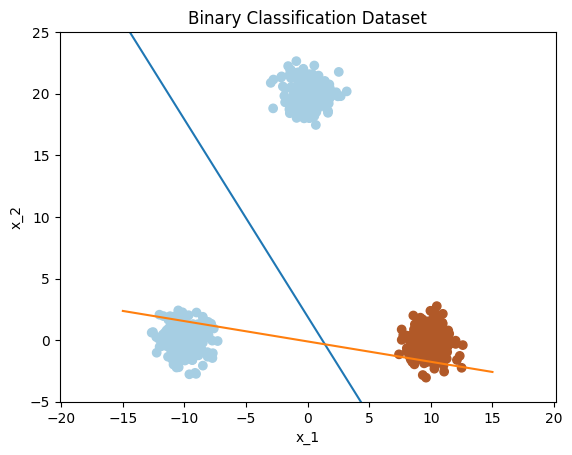

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.577691397799E+01  Residual=-.800000000000E+01
Ext.iteration=45  Objective=0.309952599630E+01  Residual=-.546711475596E+01
Start stage  1
Ext.iteration=0  Objective=0.951259077245E-13  Residual=-.546711475596E+01
Ext.iteration=31  Objective=-.303869827643E+02  Residual=-.568434188608E-13
Start stage  2
Ext.iteration=0  Objective=0.169559376868E-11  Residual=0.227373675443E-12
Ext.iteration=96  Objective=-.490870687544E+01  Residual=0.209115583516E-06
Start stage  3
Ext.iteration=0  Objective=0.124753066345E-11  Residual=0.209115583516E-06
Ext.iteration=46  Objective=-.126193512043E+00  Residual=-.620624060515E-01
Start stage  4
Ext.iteration=0  Objective=0.126641944137E-11  Residual=-.620624060515E-01
Ext.iteration=7  

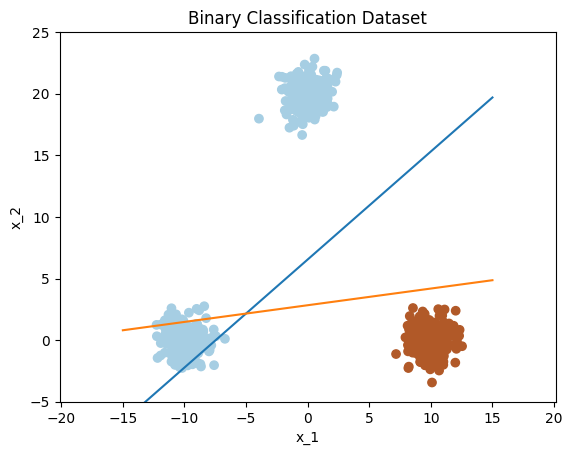

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.598699251563E+01  Residual=-.800000000000E+01
Ext.iteration=23  Objective=0.346723137913E+01  Residual=-.509077658470E+01
Start stage  1
Ext.iteration=0  Objective=0.116527887606E-12  Residual=-.509077658470E+01
Ext.iteration=24  Objective=-.396702815522E+02  Residual=-.245857868623E+03
Start stage  2
Ext.iteration=0  Objective=0.183248371078E-11  Residual=-.245857868623E+03
Ext.iteration=83  Objective=-.351953248718E+01  Residual=0.467181848762E-11
Start stage  3
Ext.iteration=0  Objective=0.196144673429E-11  Residual=0.467181848762E-11
Ext.iteration=56  Objective=-.237100254815E+00  Residual=-.492656410910E-01
Start stage  4
Ext.iteration=0  Objective=0.159194257745E-11  Residual=-.492656410910E-01
Ext.iteration=44  Objective=-.101689448525E-02  Residu

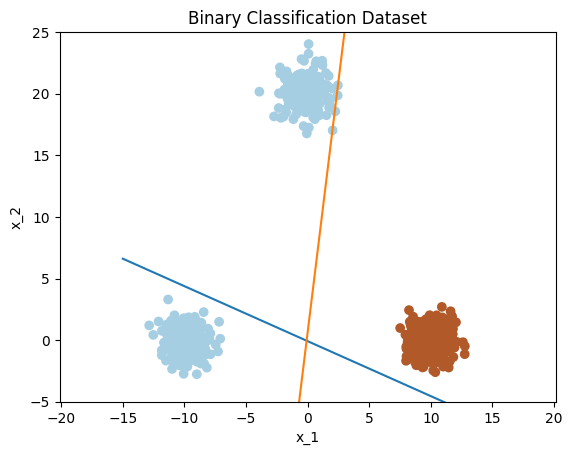

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.628065736155E+01  Residual=-.800000000000E+01
Ext.iteration=28  Objective=0.349417822746E+01  Residual=-.490965295098E+01
Start stage  1
Ext.iteration=0  Objective=0.116084904094E-12  Residual=-.490965295098E+01
Ext.iteration=25  Objective=-.412456003516E+02  Residual=-.191450951048E+03
Start stage  2
Ext.iteration=0  Objective=0.160080996183E-11  Residual=-.191450951048E+03
Ext.iteration=104  Objective=-.436967135360E+01  Residual=-.228575935335E-04
Start stage  3
Ext.iteration=0  Objective=0.136313496423E-11  Residual=-.228575935335E-04
Ext.iteration=32  Objective=-.303023126501E+00  Residual=-.198226059918E+00
Start stage  4
Ext.iteration=0  Objective=0.137401028133E-11  Residual=-.198226059918E+00
Ext.iteration=75  Objective=-.410286343510E-01  Resid

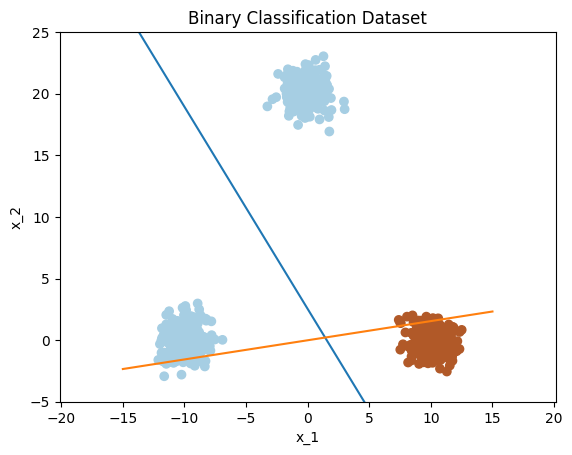

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.585619775972E+01  Residual=-.800000000000E+01
Ext.iteration=27  Objective=0.305009185680E+01  Residual=-.283769010567E+01
Start stage  1
Ext.iteration=0  Objective=0.986887949208E-13  Residual=-.283769010567E+01
Ext.iteration=36  Objective=-.234307842947E+02  Residual=-.201482789821E+03
Start stage  2
Ext.iteration=0  Objective=0.167428797326E-11  Residual=-.201482789821E+03
Ext.iteration=95  Objective=-.716189139478E+01  Residual=0.423125900539E-06
Start stage  3
Ext.iteration=0  Objective=0.185059218652E-11  Residual=0.423125904092E-06
Ext.iteration=63  Objective=-.924834233096E+00  Residual=-.324541460831E+00
Start stage  4
Ext.iteration=0  Objective=0.125121408557E-11  Residual=-.324541460831E+00
Ext.iteration=31 

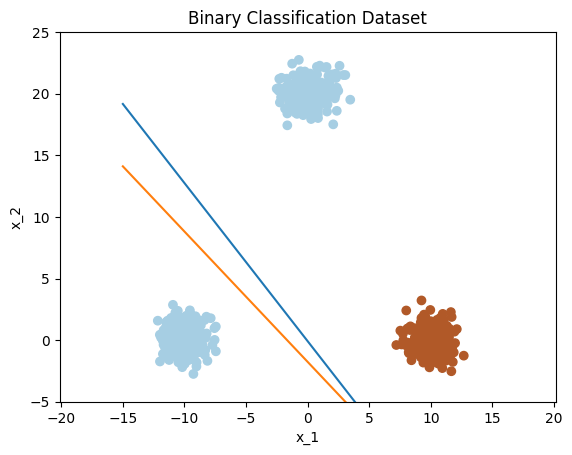

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.619089258974E+01  Residual=-.800000000000E+01
Ext.iteration=27  Objective=0.354601756119E+01  Residual=-.392430006069E+01
Start stage  1
Ext.iteration=0  Objective=0.130371002077E-12  Residual=-.392430006069E+01
Ext.iteration=67  Objective=-.286016888620E+02  Residual=-.332425645023E+03
Start stage  2
Ext.iteration=0  Objective=0.171106434447E-11  Residual=-.332425645023E+03
Ext.iteration=38  Objective=-.919522004998E+01  Residual=0.923456866531E-10
Start stage  3
Ext.iteration=0  Objective=0.190637875630E-11  Residual=0.923456866531E-10
Ext.iteration=54  Objective=-.528680856137E+00  Residual=-.357158594715E+01
Start stage  4
Ext.iteration=0  Objective=0.142471840213E-11  Residual=-.357158594715E+01
Ext.iteration=67  Objective=-.871358033381E-01  Residu

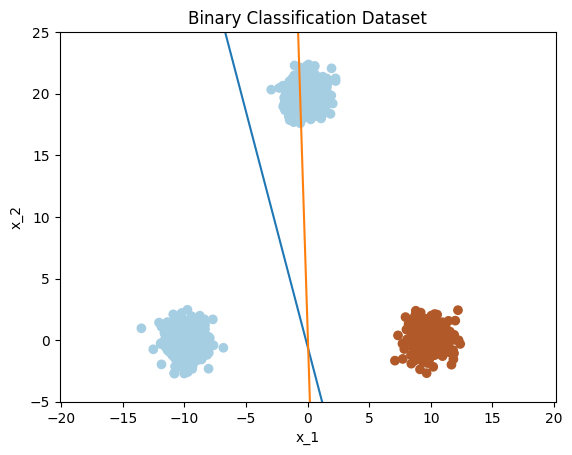

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.565067279531E+01  Residual=-.800000000000E+01
Ext.iteration=24  Objective=0.356625603109E+01  Residual=-.515623261392E+01
Start stage  1
Ext.iteration=0  Objective=0.118148406443E-12  Residual=-.515623261392E+01
Ext.iteration=43  Objective=-.409473754152E+02  Residual=-.280422024284E+03
Start stage  2
Ext.iteration=0  Objective=0.153432032831E-11  Residual=-.280422024284E+03
Ext.iteration=109  Objective=-.356536453393E+01  Residual=-.258625335023E+01
Start stage  3
Ext.iteration=0  Objective=0.135985965281E-11  Residual=-.258625335023E+01
Ext.iteration=33  Objective=-.335932674808E+00  Residual=-.521688392887E+01
Start stage  4
Ext.iteration=0  Objective=0.128942212297E-11  Residual=-.521688392887E+01
Ext.iteration=34

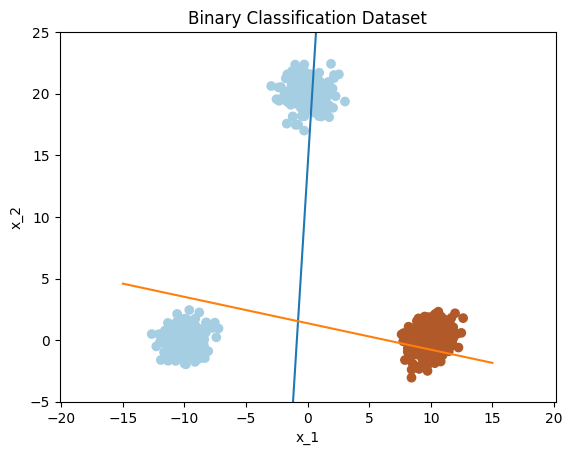

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.611248695416E+01  Residual=-.800000000000E+01
Ext.iteration=25  Objective=0.345904482535E+01  Residual=-.567009666073E+01
Start stage  1
Ext.iteration=0  Objective=0.117189052797E-12  Residual=-.567009666073E+01
Ext.iteration=34  Objective=-.432580561034E+02  Residual=-.269105700140E+03
Start stage  2
Ext.iteration=0  Objective=0.168491183273E-11  Residual=-.269105700140E+03
Ext.iteration=57  Objective=-.311633932264E+01  Residual=0.715029868203E-06
Start stage  3
Ext.iteration=0  Objective=0.163347384335E-11  Residual=0.715029868203E-06
Ext.iteration=46  Objective=-.294805344696E+00  Residual=-.174683294903E-02
Start stage  4
Ext.iteration=0  Objective=0.128521769078E-11  Residual=-.174683294903E-02
Ext.iteration=46  Objective=-.219599713010E-02  Residu

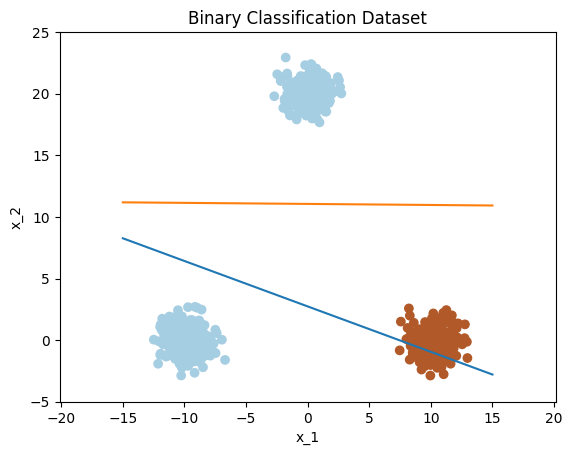

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.604245010726E+01  Residual=-.800000000000E+01
Ext.iteration=28  Objective=0.336033977769E+01  Residual=-.528403812697E+01
Start stage  1
Ext.iteration=0  Objective=0.108092656606E-12  Residual=-.528403812697E+01
Ext.iteration=26  Objective=-.431277675335E+02  Residual=-.207659559759E+03
Start stage  2
Ext.iteration=0  Objective=0.170380124938E-11  Residual=-.207659559759E+03
Ext.iteration=102  Objective=-.315688741352E+01  Residual=0.428092441496E-06
Start stage  3
Ext.iteration=0  Objective=0.131509406820E-11  Residual=0.428092441496E-06
Ext.iteration=57  Objective=-.924000595913E-01  Residual=-.304154524877E-01
Start stage  4
Ext.iteration=0  Objective=0.117152011440E-11  Residual=-.304154524877E-01
Ext.iteration=8  Objective=-.257815950423E-03  Residu

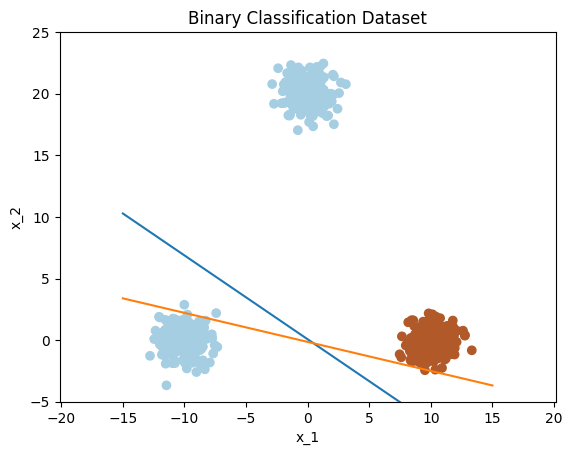

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.637942215629E+01  Residual=-.800000000000E+01
Ext.iteration=31  Objective=0.369822196580E+01  Residual=-.420970625414E+01
Start stage  1
Ext.iteration=0  Objective=0.124870164963E-12  Residual=-.420970625414E+01
Ext.iteration=28  Objective=-.421238847899E+02  Residual=-.223111525212E+03
Start stage  2
Ext.iteration=0  Objective=0.168190964279E-11  Residual=-.223111525212E+03
Ext.iteration=89  Objective=-.403387724789E+01  Residual=0.328999050225E-10
Start stage  3
Ext.iteration=0  Objective=0.172490920033E-11  Residual=0.328999050225E-10
Ext.iteration=48  Objective=-.559634340982E+00  Residual=-.135859394845E-07
Start stage  4
Ext.iteration=0  Objective=0.134610507589E-11  Residual=-.135859394845E-07
Ext.iteration=76 

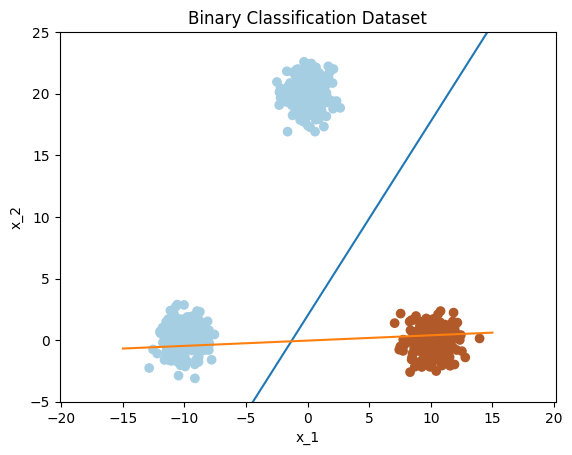

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.592981608871E+01  Residual=-.800000000000E+01
Ext.iteration=46  Objective=0.313555534610E+01  Residual=-.434511083416E+01
Start stage  1
Ext.iteration=0  Objective=0.103877316443E-12  Residual=-.434511083416E+01
Ext.iteration=43  Objective=-.254074423225E+02  Residual=-.360777187432E+03
Start stage  2
Ext.iteration=0  Objective=0.161689558486E-11  Residual=-.360777187432E+03
Ext.iteration=42  Objective=-.766129984937E+01  Residual=0.505536062789E-06
Start stage  3
Ext.iteration=0  Objective=0.176102335139E-11  Residual=0.505536055684E-06
Ext.iteration=56  Objective=-.791554857737E+00  Residual=-.542712164447E-02
Start stage  4
Ext.iteration=0  Objective=0.132557425444E-11  Residual=-.542712164447E-02
Ext.iteration=47  Objective=-.361976489152E+00  Residu

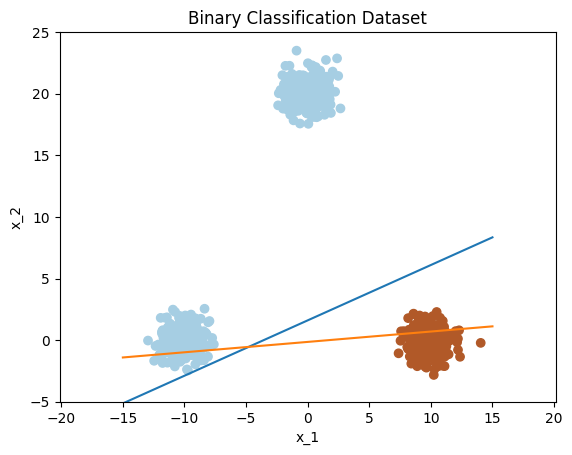

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.600528949549E+01  Residual=-.800000000000E+01
Ext.iteration=48  Objective=0.362840134781E+01  Residual=-.564069131907E+01
Start stage  1
Ext.iteration=0  Objective=0.129274045273E-12  Residual=-.564069131907E+01
Ext.iteration=27  Objective=-.444506830498E+02  Residual=-.262541664156E+03
Start stage  2
Ext.iteration=0  Objective=0.158387780357E-11  Residual=-.262541664156E+03
Ext.iteration=67  Objective=-.402906384694E+01  Residual=0.394953413974E-06
Start stage  3
Ext.iteration=0  Objective=0.174998318353E-11  Residual=0.394953413974E-06
Ext.iteration=37  Objective=-.149288815067E-01  Residual=-.654734668615E-05
Start stage  4
Ext.iteration=0  Objective=0.173222183897E-11  Residual=-.654734668615E-05
Ext.iteration=29 

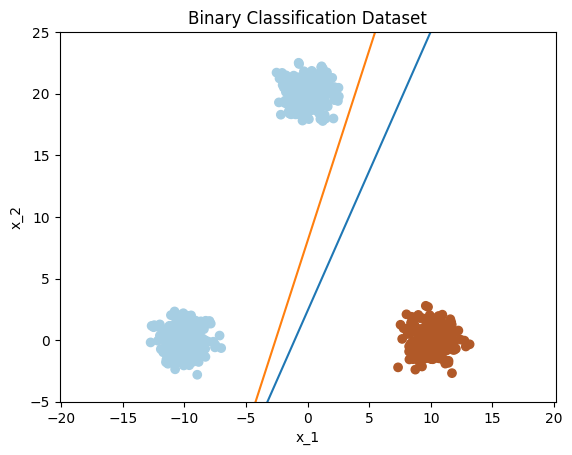

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.630231449531E+01  Residual=-.800000000000E+01
Ext.iteration=93  Objective=0.370763228887E+01  Residual=-.639240636747E+01
Start stage  1
Ext.iteration=0  Objective=0.155887479208E-12  Residual=-.639240636747E+01
Ext.iteration=34  Objective=-.494917215193E+02  Residual=0.147792889038E-11
Start stage  2
Ext.iteration=0  Objective=0.175702364699E-11  Residual=0.136424205266E-11
Ext.iteration=84  Objective=-.432130496969E+01  Residual=-.175869376478E-02
Start stage  3
Ext.iteration=0  Objective=0.176827386604E-11  Residual=-.175869376478E-02
Ext.iteration=50  Objective=-.696492399406E+00  Residual=-.300626456006E+01
Start stage  4
Ext.iteration=0  Objective=0.133523860788E-11  Residual=-.300626456006E+01
Ext.iteration=51  Objective=-.150158719265E+00  Residu

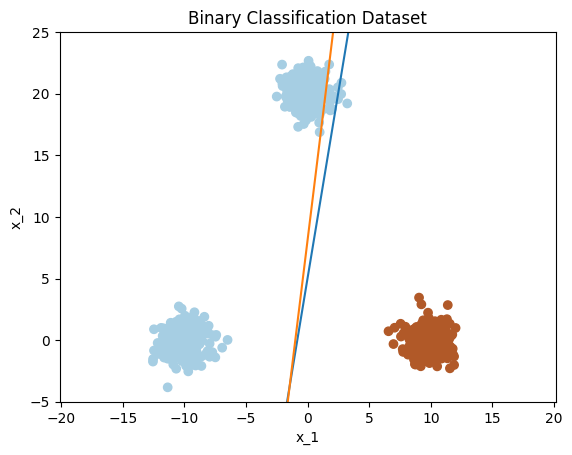

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.655872732176E+01  Residual=-.800000000000E+01
Ext.iteration=33  Objective=0.373345916177E+01  Residual=-.657933568521E+01
Start stage  1
Ext.iteration=0  Objective=0.140795927101E-12  Residual=-.657933568521E+01
Ext.iteration=45  Objective=-.476146103983E+02  Residual=-.620120607948E+02
Start stage  2
Ext.iteration=0  Objective=0.163471287646E-11  Residual=-.620120607948E+02
Ext.iteration=69  Objective=-.243122968142E+01  Residual=-.193421143131E-01
Start stage  3
Ext.iteration=0  Objective=0.163150401492E-11  Residual=-.193421143131E-01
Ext.iteration=46  Objective=-.122423405237E+00  Residual=-.194632165543E+01
Start stage  4
Ext.iteration=0  Objective=0.168552272521E-11  Residual=-.194632165543E+01
Ext.iteration=71  Objective=-.310449344898E-01  Residu

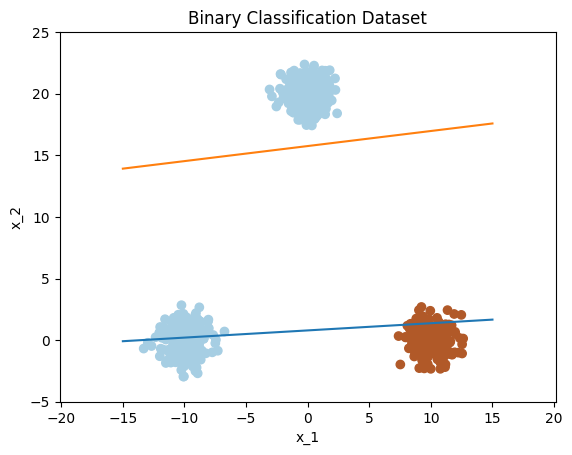

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.567544173479E+01  Residual=-.800000000000E+01
Ext.iteration=24  Objective=0.299975096135E+01  Residual=-.605319763140E+01
Start stage  1
Ext.iteration=0  Objective=0.963523585355E-13  Residual=-.605319763140E+01
Ext.iteration=32  Objective=-.292022700570E+02  Residual=-.259198319111E+03
Start stage  2
Ext.iteration=0  Objective=0.167923742513E-11  Residual=-.259198319111E+03
Ext.iteration=50  Objective=-.453353501218E+01  Residual=-.518357420384E-01
Start stage  3
Ext.iteration=0  Objective=0.126439887678E-11  Residual=-.518357420384E-01
Ext.iteration=56  Objective=-.221500457497E+00  Residual=-.473084847954E-04
Start stage  4
Ext.iteration=0  Objective=0.113928126269E-11  Residual=-.473084847954E-04
Ext.iteration=44 

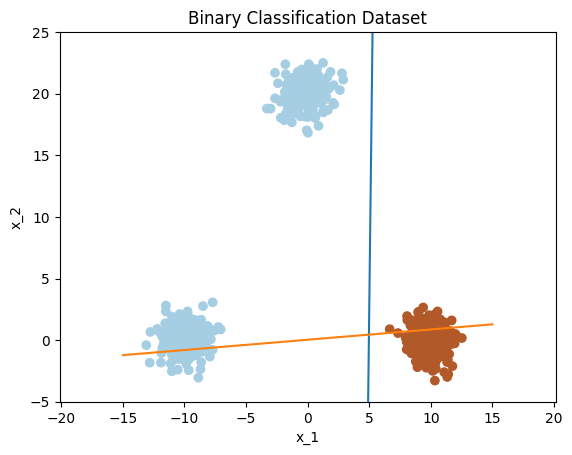

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.664414658689E+01  Residual=-.800000000000E+01
Ext.iteration=27  Objective=0.341544030840E+01  Residual=-.512074905937E+01
Start stage  1
Ext.iteration=0  Objective=0.118647265281E-12  Residual=-.512074905937E+01
Ext.iteration=30  Objective=-.354024482849E+02  Residual=-.292753884192E+03
Start stage  2
Ext.iteration=0  Objective=0.163797839802E-11  Residual=-.292753884192E+03
Ext.iteration=69  Objective=-.544919533558E+01  Residual=0.718889511475E-06
Start stage  3
Ext.iteration=0  Objective=0.176911072522E-11  Residual=0.718889511475E-06
Ext.iteration=53  Objective=-.529959956171E+00  Residual=-.481190898111E-01
Start stage  4
Ext.iteration=0  Objective=0.148081467449E-11  Residual=-.481190898111E-01
Ext.iteration=49  Objective=-.645424538762E-02  Residu

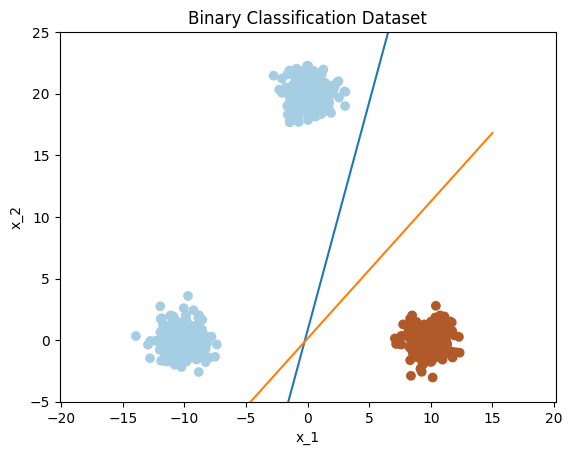

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.630926914751E+01  Residual=-.800000000000E+01
Ext.iteration=25  Objective=0.353129355524E+01  Residual=-.716198228138E+01
Start stage  1
Ext.iteration=0  Objective=0.126760932919E-12  Residual=-.716198228138E+01
Ext.iteration=47  Objective=-.454319654219E+02  Residual=0.170530256582E-12
Start stage  2
Ext.iteration=0  Objective=0.156527650396E-11  Residual=0.284217094304E-12
Ext.iteration=136  Objective=-.329488571774E+01  Residual=-.564483173861E+01
Start stage  3
Ext.iteration=0  Objective=0.160467650524E-11  Residual=-.564483173861E+01
Ext.iteration=41  Objective=-.178960979068E+00  Residual=0.648653042390E-08
Start stage  4
Ext.iteration=0  Objective=0.148995462833E-11  Residual=0.648653042390E-08
Ext.iteration=56

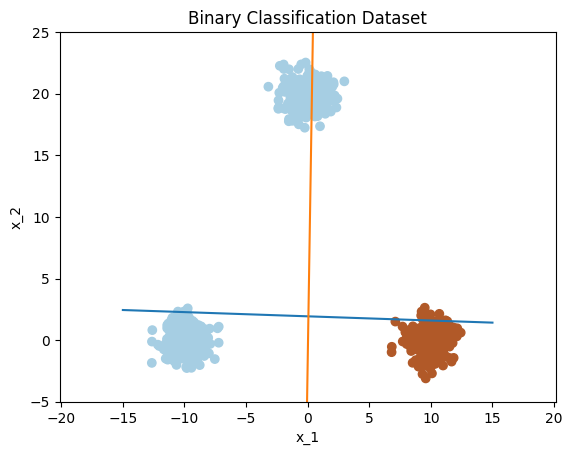

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.589123960393E+01  Residual=-.800000000000E+01
Ext.iteration=29  Objective=0.316280589534E+01  Residual=-.610720393718E+01
Start stage  1
Ext.iteration=0  Objective=0.120534730844E-12  Residual=-.610720393718E+01
Ext.iteration=40  Objective=-.329205598918E+02  Residual=-.231689108900E+03
Start stage  2
Ext.iteration=0  Objective=0.162962672021E-11  Residual=-.231689108900E+03
Ext.iteration=54  Objective=-.570565205265E+01  Residual=-.247163895537E-04
Start stage  3
Ext.iteration=0  Objective=0.154311934155E-11  Residual=-.247163895537E-04
Ext.iteration=49  Objective=-.488845645441E+00  Residual=-.353811552612E+01
Start stage  4
Ext.iteration=0  Objective=0.130665383220E-11  Residual=-.353811552612E+01
Ext.iteration=43  Objective=-.104812491692E+00  Residu

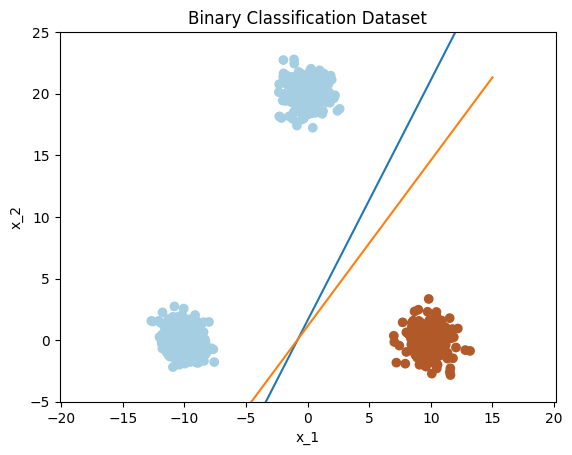

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.614126652964E+01  Residual=-.800000000000E+01
Ext.iteration=27  Objective=0.364534242589E+01  Residual=-.758882973806E+01
Start stage  1
Ext.iteration=0  Objective=0.126445932612E-12  Residual=-.758882973806E+01
Ext.iteration=49  Objective=-.449158772803E+02  Residual=-.810338210203E+02
Start stage  2
Ext.iteration=0  Objective=0.165276096450E-11  Residual=-.810338210203E+02
Ext.iteration=58  Objective=-.529629925038E+01  Residual=-.354407760739E-05
Start stage  3
Ext.iteration=0  Objective=0.133440723275E-11  Residual=-.354407760739E-05
Ext.iteration=34  Objective=-.101192340388E+00  Residual=0.419425933984E-06
Start stage  4
Ext.iteration=0  Objective=0.131703505166E-11  Residual=0.419425933984E-06
Ext.iteration=34  Objective=-.132750715009E-02  Residu

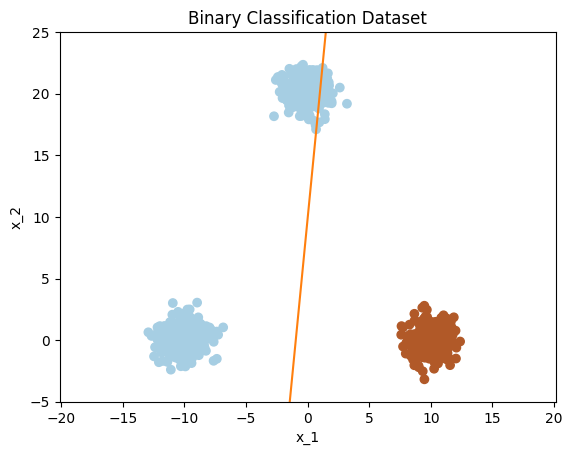

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.640290938365E+01  Residual=-.800000000000E+01
Ext.iteration=37  Objective=0.362955116425E+01  Residual=-.488675687801E+01
Start stage  1
Ext.iteration=0  Objective=0.124163327110E-12  Residual=-.488675687801E+01
Ext.iteration=26  Objective=-.340420237102E+02  Residual=-.289798037543E+03
Start stage  2
Ext.iteration=0  Objective=0.173720388010E-11  Residual=-.289798037543E+03
Ext.iteration=55  Objective=-.519606811799E+01  Residual=0.495599714156E-06
Start stage  3
Ext.iteration=0  Objective=0.203111461434E-11  Residual=0.495599714156E-06
Ext.iteration=52  Objective=-.536086923044E-01  Residual=-.714374540974E-02
Start stage  4
Ext.iteration=0  Objective=0.180384929986E-11  Residual=-.714374540974E-02
Ext.iteration=55  Objective=-.188914347658E-01  Residu

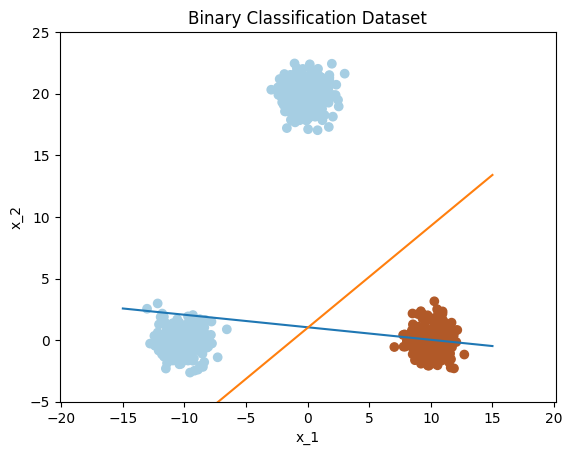

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.616063221219E+01  Residual=-.800000000000E+01
Ext.iteration=47  Objective=0.339675725328E+01  Residual=-.576322060346E+01
Start stage  1
Ext.iteration=0  Objective=0.118454914976E-12  Residual=-.576322060346E+01
Ext.iteration=64  Objective=-.426122175585E+02  Residual=-.383310859913E+01
Start stage  2
Ext.iteration=0  Objective=0.181043395341E-11  Residual=-.383310859914E+01
Ext.iteration=89  Objective=-.548411086974E+01  Residual=-.627918428504E-01
Start stage  3
Ext.iteration=0  Objective=0.136586617201E-11  Residual=-.627918428504E-01
Ext.iteration=29  Objective=-.138458098022E+00  Residual=-.260565281439E-01
Start stage  4
Ext.iteration=0  Objective=0.125959410733E-11  Residual=-.260565281439E-01
Ext.iteration=65  Objective=-.211047000297E-03  Residu

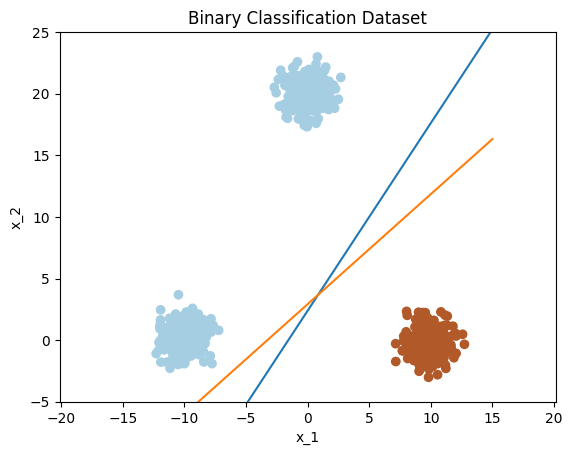

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.592453904933E+01  Residual=-.800000000000E+01
Ext.iteration=23  Objective=0.342921002476E+01  Residual=-.488591688187E+01
Start stage  1
Ext.iteration=0  Objective=0.120619718709E-12  Residual=-.488591688187E+01
Ext.iteration=33  Objective=-.395630491385E+02  Residual=-.246511402436E+03
Start stage  2
Ext.iteration=0  Objective=0.148125135045E-11  Residual=-.246511402436E+03
Ext.iteration=74  Objective=-.386908256183E+01  Residual=0.851144932312E-09
Start stage  3
Ext.iteration=0  Objective=0.159201171151E-11  Residual=0.851144932312E-09
Ext.iteration=48  Objective=-.425698308202E+00  Residual=-.147148619838E+01
Start stage  4
Ext.iteration=0  Objective=0.134419475791E-11  Residual=-.147148619838E+01
Ext.iteration=64  Objective=-.259247677802E-01  Residu

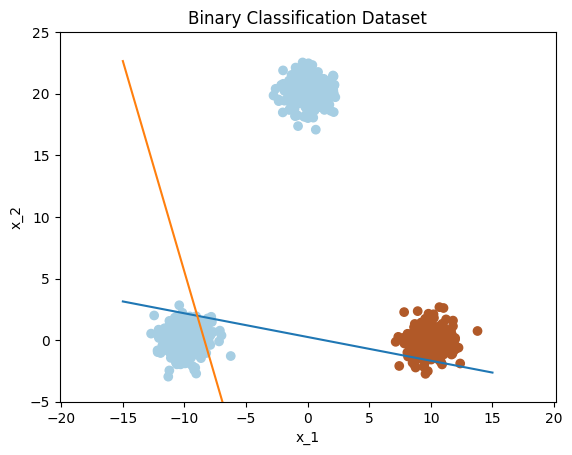

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.651224263084E+01  Residual=-.800000000000E+01
Ext.iteration=39  Objective=0.327522614513E+01  Residual=-.541966075571E+01
Start stage  1
Ext.iteration=0  Objective=0.109349634725E-12  Residual=-.541966075571E+01
Ext.iteration=32  Objective=-.314338064050E+02  Residual=-.282978563382E+03
Start stage  2
Ext.iteration=0  Objective=0.179090259601E-11  Residual=-.282978563382E+03
Ext.iteration=45  Objective=-.528059433550E+01  Residual=0.218847162614E-11
Start stage  3
Ext.iteration=0  Objective=0.170324387687E-11  Residual=0.218847162614E-11
Ext.iteration=56  Objective=-.547921677705E+00  Residual=-.799771267759E-01
Start stage  4
Ext.iteration=0  Objective=0.130303571332E-11  Residual=-.799771267759E-01
Ext.iteration=44 

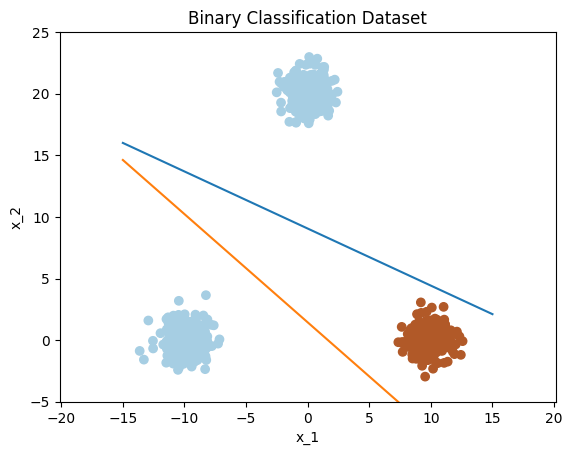

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.649474934534E+01  Residual=-.800000000000E+01
Ext.iteration=48  Objective=0.386654208891E+01  Residual=-.647128716658E+01
Start stage  1
Ext.iteration=0  Objective=0.144334564422E-12  Residual=-.647128716658E+01
Ext.iteration=46  Objective=-.484555398444E+02  Residual=-.174002407298E+03
Start stage  2
Ext.iteration=0  Objective=0.181564213084E-11  Residual=-.174002407298E+03
Ext.iteration=95  Objective=-.373721981380E+01  Residual=-.354304926382E-03
Start stage  3
Ext.iteration=0  Objective=0.128283638854E-11  Residual=-.354304926382E-03
Ext.iteration=37  Objective=-.370878360923E-01  Residual=0.713397854568E-06
Start stage  4
Ext.iteration=0  Objective=0.134587358000E-11  Residual=0.713397854568E-06
Ext.iteration=36 

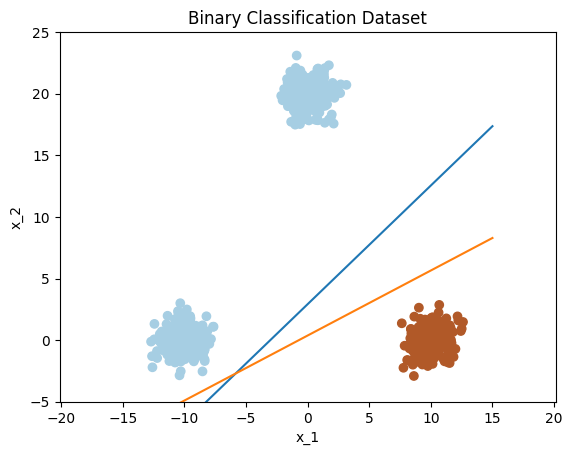

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.613762976150E+01  Residual=-.800000000000E+01
Ext.iteration=27  Objective=0.297743776489E+01  Residual=-.572566862685E+01
Start stage  1
Ext.iteration=0  Objective=0.988334330515E-13  Residual=-.572566862685E+01
Ext.iteration=40  Objective=-.317092043667E+02  Residual=-.188188067468E+03
Start stage  2
Ext.iteration=0  Objective=0.157922185040E-11  Residual=-.188188067468E+03
Ext.iteration=141  Objective=-.303068270807E+01  Residual=0.000000000000E+00
Start stage  3
Ext.iteration=0  Objective=0.134642122657E-11  Residual=0.142108547152E-13
Ext.iteration=66  Objective=-.181959622240E+00  Residual=-.147271863480E+01
Start stage  4
Ext.iteration=0  Objective=0.121111303415E-11  Residual=-.147271863480E+01
Ext.iteration=40  Objective=-.123435482432E-01  Resid

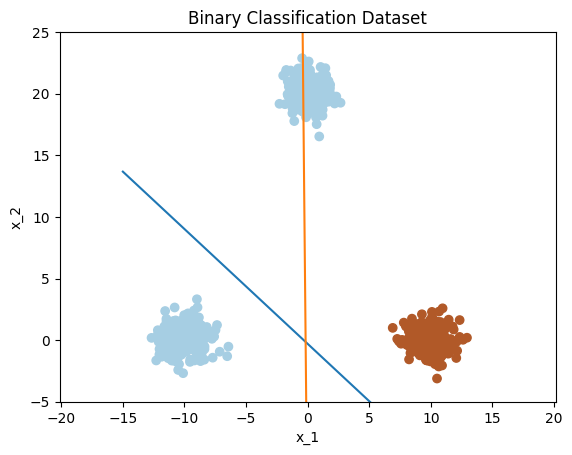

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.638797810442E+01  Residual=-.800000000000E+01
Ext.iteration=69  Objective=0.375417156279E+01  Residual=-.542780053052E+01
Start stage  1
Ext.iteration=0  Objective=0.130407421747E-12  Residual=-.542780053052E+01
Ext.iteration=36  Objective=-.457050117067E+02  Residual=-.256640963107E+03
Start stage  2
Ext.iteration=0  Objective=0.157894412085E-11  Residual=-.256640963107E+03
Ext.iteration=108  Objective=-.420936599161E+01  Residual=0.353015394694E-10
Start stage  3
Ext.iteration=0  Objective=0.167669946787E-11  Residual=0.353015394694E-10
Ext.iteration=51  Objective=-.581875848490E+00  Residual=-.153338818896E-01
Start stage  4
Ext.iteration=0  Objective=0.122524373637E-11  Residual=-.153338818896E-01
Ext.iteration=33  Objective=-.153347241515E-02  Resid

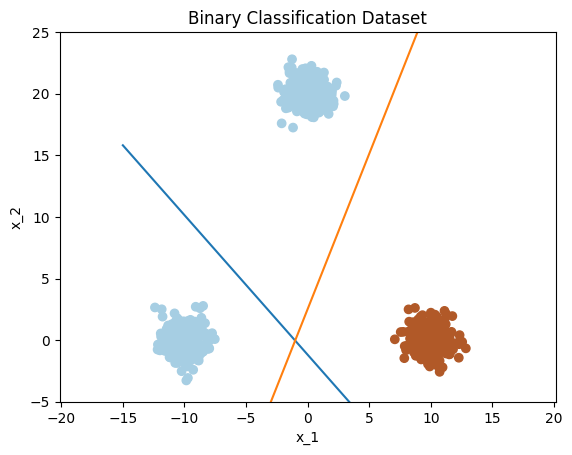

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.638938077939E+01  Residual=-.800000000000E+01
Ext.iteration=28  Objective=0.346018408237E+01  Residual=-.488802448989E+01
Start stage  1
Ext.iteration=0  Objective=0.108896710759E-12  Residual=-.488802448989E+01
Ext.iteration=46  Objective=-.330978273363E+02  Residual=-.881774181254E+02
Start stage  2
Ext.iteration=0  Objective=0.166152651623E-11  Residual=-.881774181254E+02
Ext.iteration=66  Objective=-.447488014940E+01  Residual=-.655980189242E-01
Start stage  3
Ext.iteration=0  Objective=0.125493468029E-11  Residual=-.655980189242E-01
Ext.iteration=48  Objective=-.271265371571E+00  Residual=-.146750573903E+01
Start stage  4
Ext.iteration=0  Objective=0.114833703542E-11  Residual=-.146750573903E+01
Ext.iteration=34 

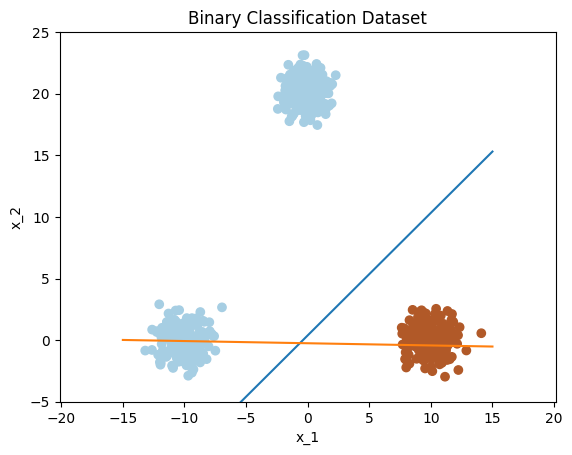

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.677163354923E+01  Residual=-.800000000000E+01
Ext.iteration=34  Objective=0.398510667804E+01  Residual=-.587605990901E+01
Start stage  1
Ext.iteration=0  Objective=0.155009346861E-12  Residual=-.587605990901E+01
Ext.iteration=24  Objective=-.485825276799E+02  Residual=-.271038599122E+03
Start stage  2
Ext.iteration=0  Objective=0.173670647841E-11  Residual=-.271038599122E+03
Ext.iteration=49  Objective=-.436101371176E+01  Residual=0.159872115546E-12
Start stage  3
Ext.iteration=0  Objective=0.188556937969E-11  Residual=0.181188397619E-12
Ext.iteration=63  Objective=-.767522499040E-01  Residual=-.292457375678E+01
Start stage  4
Ext.iteration=0  Objective=0.167656715154E-11  Residual=-.292457375678E+01
Ext.iteration=51  Objective=-.790985791246E-01  Residu

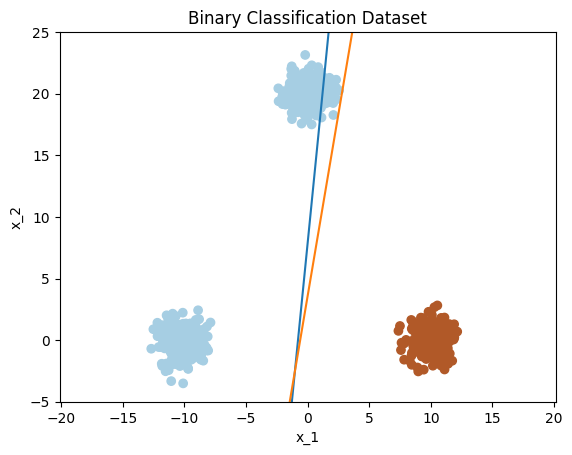

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.637840363292E+01  Residual=-.800000000000E+01
Ext.iteration=37  Objective=0.374246610078E+01  Residual=-.624817194570E+01
Start stage  1
Ext.iteration=0  Objective=0.129075342529E-12  Residual=-.624817194570E+01
Ext.iteration=45  Objective=-.476276320348E+02  Residual=0.568434188608E-13
Start stage  2
Ext.iteration=0  Objective=0.178399238008E-11  Residual=0.568434188608E-13
Ext.iteration=127  Objective=-.354614469426E+01  Residual=0.774903398337E-06
Start stage  3
Ext.iteration=0  Objective=0.166413291138E-11  Residual=0.774903398337E-06
Ext.iteration=62  Objective=-.329636432973E+00  Residual=-.125214230127E+01
Start stage  4
Ext.iteration=0  Objective=0.142469772161E-11  Residual=-.125214230127E+01
Ext.iteration=61  Objective=-.108322997487E+00  Resid

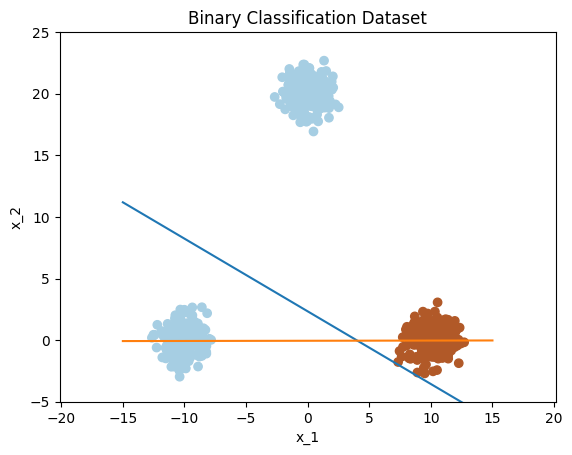

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.603819411724E+01  Residual=-.800000000000E+01
Ext.iteration=27  Objective=0.368879560389E+01  Residual=-.688939528577E+01
Start stage  1
Ext.iteration=0  Objective=0.119960496645E-12  Residual=-.688939528577E+01
Ext.iteration=46  Objective=-.464815144367E+02  Residual=-.160263152429E+03
Start stage  2
Ext.iteration=0  Objective=0.162455983641E-11  Residual=-.160263152429E+03
Ext.iteration=140  Objective=-.336982452416E+01  Residual=0.301015745663E-06
Start stage  3
Ext.iteration=0  Objective=0.164507948935E-11  Residual=0.301015859350E-06
Ext.iteration=53  Objective=-.200185889055E+00  Residual=-.177084628622E+01
Start stage  4
Ext.iteration=0  Objective=0.135701066989E-11  Residual=-.177084628622E+01
Ext.iteration=66  Objective=-.219304464824E-01  Resid

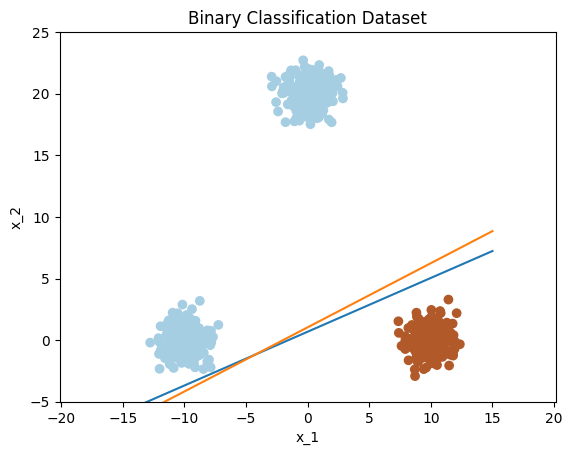

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.570881924964E+01  Residual=-.800000000000E+01
Ext.iteration=31  Objective=0.311601397946E+01  Residual=-.721956854692E+01
Start stage  1
Ext.iteration=0  Objective=0.102685652554E-12  Residual=-.721956854692E+01
Ext.iteration=39  Objective=-.381910683246E+02  Residual=-.198519237878E+03
Start stage  2
Ext.iteration=0  Objective=0.161743527211E-11  Residual=-.198519237878E+03
Ext.iteration=102  Objective=-.407380423226E+01  Residual=0.592341582006E-06
Start stage  3
Ext.iteration=0  Objective=0.126027429073E-11  Residual=0.592341582006E-06
Ext.iteration=65  Objective=-.116300125366E+00  Residual=-.425248019511E+00
Start stage  4
Ext.iteration=0  Objective=0.111268949499E-11  Residual=-.425248019511E+00
Ext.iteration=7  Objective=-.222363383417E-02  Residu

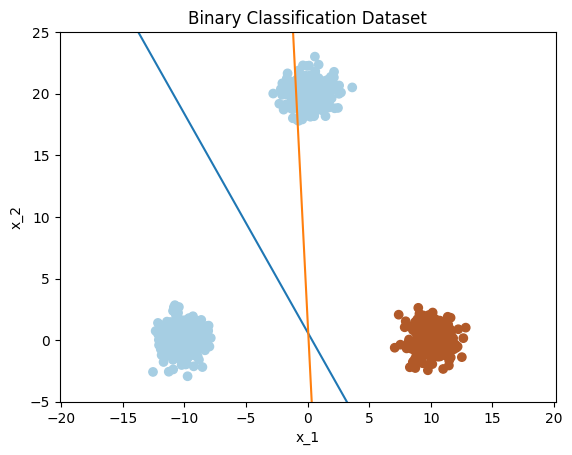

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.588786395667E+01  Residual=-.800000000000E+01
Ext.iteration=24  Objective=0.346736760104E+01  Residual=-.546351603738E+01
Start stage  1
Ext.iteration=0  Objective=0.129087714791E-12  Residual=-.546351603738E+01
Ext.iteration=45  Objective=-.464007154424E+02  Residual=-.225449471534E+03
Start stage  2
Ext.iteration=0  Objective=0.177270641159E-11  Residual=-.225449471534E+03
Ext.iteration=49  Objective=-.344301768271E+01  Residual=-.213162820728E-13
Start stage  3
Ext.iteration=0  Objective=0.190169773251E-11  Residual=-.213162820728E-13
Ext.iteration=52  Objective=-.222642819823E+00  Residual=-.258605848293E+01
Start stage  4
Ext.iteration=0  Objective=0.152100656595E-11  Residual=-.258605848293E+01
Ext.iteration=71  Objective=-.477303209854E-01  Residu

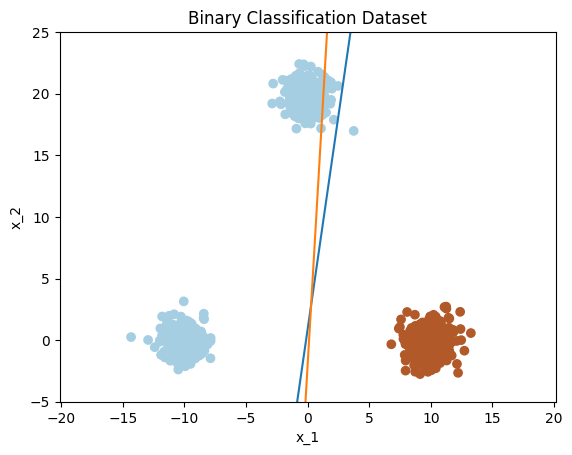

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.626558201569E+01  Residual=-.800000000000E+01
Ext.iteration=25  Objective=0.374249593173E+01  Residual=-.708925390851E+01
Start stage  1
Ext.iteration=0  Objective=0.129300519488E-12  Residual=-.708925390851E+01
Ext.iteration=46  Objective=-.501906261904E+02  Residual=-.225492913040E+03
Start stage  2
Ext.iteration=0  Objective=0.174974052810E-11  Residual=-.225492913040E+03
Ext.iteration=88  Objective=-.263201720777E+01  Residual=0.248689957516E-13
Start stage  3
Ext.iteration=0  Objective=0.180159351707E-11  Residual=0.248689957516E-13
Ext.iteration=54  Objective=-.118505932277E+00  Residual=-.376675742898E+00
Start stage  4
Ext.iteration=0  Objective=0.164180776529E-11  Residual=-.376675742898E+00
Ext.iteration=39  Objective=-.886555691578E-02  Residu

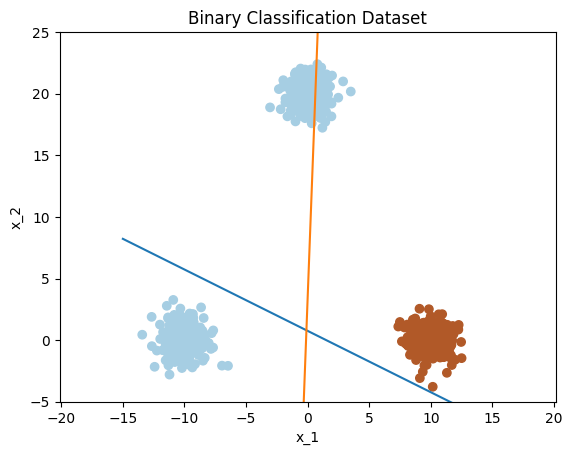

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.641033376380E+01  Residual=-.800000000000E+01
Ext.iteration=34  Objective=0.350512706899E+01  Residual=-.384956259989E+01
Start stage  1
Ext.iteration=0  Objective=0.117168792706E-12  Residual=-.384956259989E+01
Ext.iteration=29  Objective=-.308885331008E+02  Residual=-.200237746296E+03
Start stage  2
Ext.iteration=0  Objective=0.177606617715E-11  Residual=-.200237746296E+03
Ext.iteration=95  Objective=-.727573576287E+01  Residual=0.488707721402E-06
Start stage  3
Ext.iteration=0  Objective=0.196992209579E-11  Residual=0.488707721402E-06
Ext.iteration=52  Objective=-.149892684104E+00  Residual=-.327271880070E+00
Start stage  4
Ext.iteration=0  Objective=0.182278903013E-11  Residual=-.327271880070E+00
Ext.iteration=87 

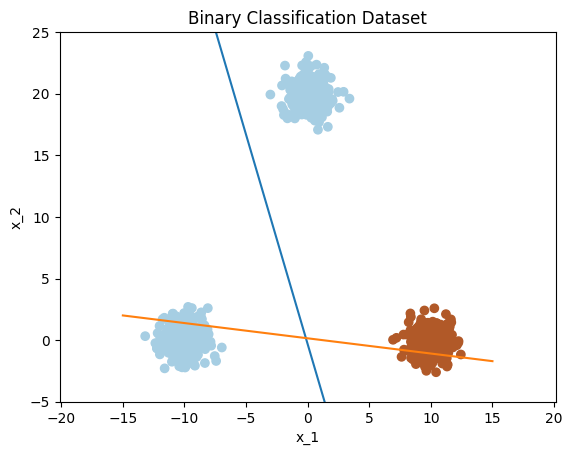

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.633568327660E+01  Residual=-.800000000000E+01
Ext.iteration=24  Objective=0.374956591515E+01  Residual=-.610214219502E+01
Start stage  1
Ext.iteration=0  Objective=0.123022756772E-12  Residual=-.610214219502E+01
Ext.iteration=32  Objective=-.434843861255E+02  Residual=-.251794233729E+03
Start stage  2
Ext.iteration=0  Objective=0.159159753504E-11  Residual=-.251794233729E+03
Ext.iteration=48  Objective=-.454224997796E+01  Residual=0.671462885293E-12
Start stage  3
Ext.iteration=0  Objective=0.130979944537E-11  Residual=0.671462885293E-12
Ext.iteration=45  Objective=-.239728345428E-01  Residual=0.445222839929E-06
Start stage  4
Ext.iteration=0  Objective=0.129188030809E-11  Residual=0.445222839929E-06
Ext.iteration=40  Objective=-.111627840398E-03  Residu

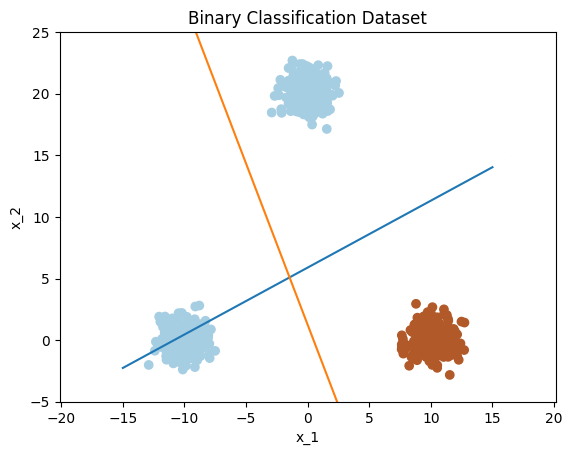

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.616790403218E+01  Residual=-.800000000000E+01
Ext.iteration=53  Objective=0.347838870475E+01  Residual=-.706166326963E+01
Start stage  1
Ext.iteration=0  Objective=0.124720677414E-12  Residual=-.706166326963E+01
Ext.iteration=52  Objective=-.428504233346E+02  Residual=-.131254073141E+03
Start stage  2
Ext.iteration=0  Objective=0.162896938899E-11  Residual=-.131254073141E+03
Ext.iteration=84  Objective=-.229199512300E+01  Residual=-.362700393026E-01
Start stage  3
Ext.iteration=0  Objective=0.143019450344E-11  Residual=-.362700393026E-01
Ext.iteration=38  Objective=-.112951585415E+00  Residual=-.274034226675E+00
Start stage  4
Ext.iteration=0  Objective=0.139512923090E-11  Residual=-.274034226675E+00
Ext.iteration=27  Objective=-.504900664674E-02  Residu

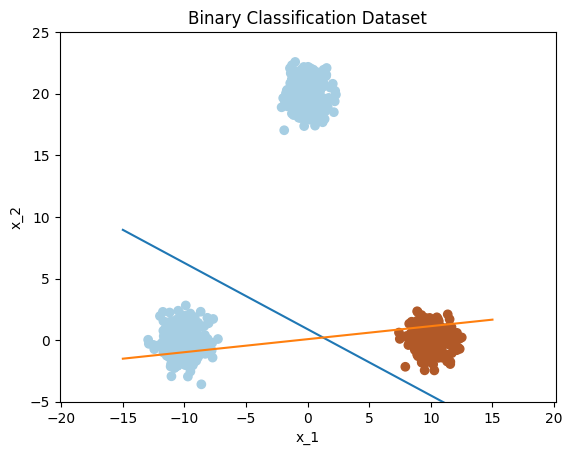

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.620329721488E+01  Residual=-.800000000000E+01
Ext.iteration=27  Objective=0.364951219070E+01  Residual=-.685856310767E+01
Start stage  1
Ext.iteration=0  Objective=0.128799347495E-12  Residual=-.685856310767E+01
Ext.iteration=37  Objective=-.505788572962E+02  Residual=0.113686837722E-11
Start stage  2
Ext.iteration=0  Objective=0.169483234051E-11  Residual=0.113686837722E-11
Ext.iteration=133  Objective=-.328131018011E+01  Residual=0.739832566765E-06
Start stage  3
Ext.iteration=0  Objective=0.194397731931E-11  Residual=0.739832566765E-06
Ext.iteration=52  Objective=-.950661862089E-01  Residual=-.273401874904E+01
Start stage  4
Ext.iteration=0  Objective=0.157344430417E-11  Residual=-.273401874904E+01
Ext.iteration=59  Objective=-.488513065504E-01  Resid

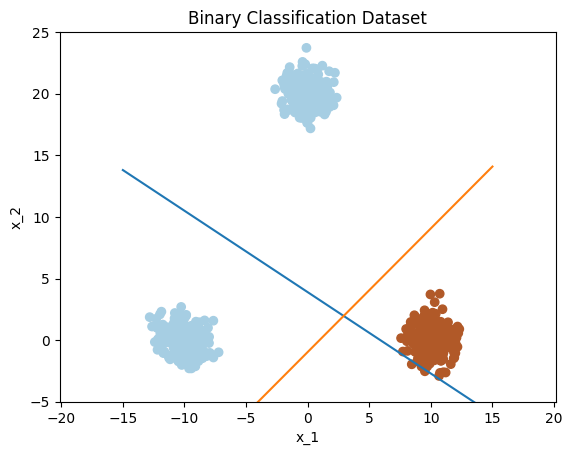

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.611489730685E+01  Residual=-.800000000000E+01
Ext.iteration=27  Objective=0.335146478829E+01  Residual=-.444369714506E+01
Start stage  1
Ext.iteration=0  Objective=0.111580218285E-12  Residual=-.444369714506E+01
Ext.iteration=51  Objective=-.296061340094E+02  Residual=-.325820579783E+03
Start stage  2
Ext.iteration=0  Objective=0.138287466518E-11  Residual=-.325820579783E+03
Ext.iteration=72  Objective=-.547191736692E+01  Residual=0.742825864819E-06
Start stage  3
Ext.iteration=0  Objective=0.157231908185E-11  Residual=0.742825864819E-06
Ext.iteration=56  Objective=-.842613693090E+00  Residual=-.772487503326E-01
Start stage  4
Ext.iteration=0  Objective=0.129167862666E-11  Residual=-.772487503326E-01
Ext.iteration=32  Objective=-.656573051944E-02  Residu

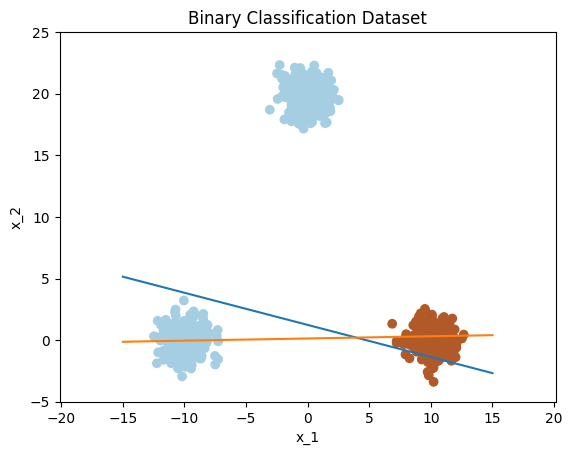

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.645697396968E+01  Residual=-.800000000000E+01
Ext.iteration=21  Objective=0.341203999392E+01  Residual=-.603203403923E+01
Start stage  1
Ext.iteration=0  Objective=0.123880146614E-12  Residual=-.603203403923E+01
Ext.iteration=46  Objective=-.397004967736E+02  Residual=-.266065218452E+03
Start stage  2
Ext.iteration=0  Objective=0.168048460745E-11  Residual=-.266065218452E+03
Ext.iteration=74  Objective=-.365512468120E+01  Residual=-.448519139954E-02
Start stage  3
Ext.iteration=0  Objective=0.132160216293E-11  Residual=-.448519139954E-02
Ext.iteration=47  Objective=-.279141801549E+00  Residual=-.397154298982E-02
Start stage  4
Ext.iteration=0  Objective=0.118845591673E-11  Residual=-.397154298982E-02
Ext.iteration=52  Objective=-.264538715640E-02  Residu

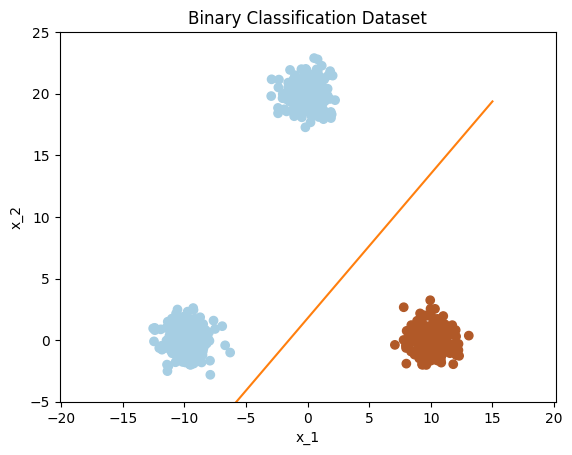

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.623238969496E+01  Residual=-.800000000000E+01
Ext.iteration=47  Objective=0.340970239458E+01  Residual=-.457170383710E+01
Start stage  1
Ext.iteration=0  Objective=0.115441359697E-12  Residual=-.457170383710E+01
Ext.iteration=43  Objective=-.318007304342E+02  Residual=-.332045863066E+03
Start stage  2
Ext.iteration=0  Objective=0.174389177751E-11  Residual=-.332045863066E+03
Ext.iteration=73  Objective=-.733276833851E+01  Residual=0.612988532822E-06
Start stage  3
Ext.iteration=0  Objective=0.200969244370E-11  Residual=0.612988532822E-06
Ext.iteration=83  Objective=-.433291813598E+00  Residual=-.120574567367E+01
Start stage  4
Ext.iteration=0  Objective=0.141297040782E-11  Residual=-.120574567367E+01
Ext.iteration=30  Objective=-.187722515329E-01  Residu

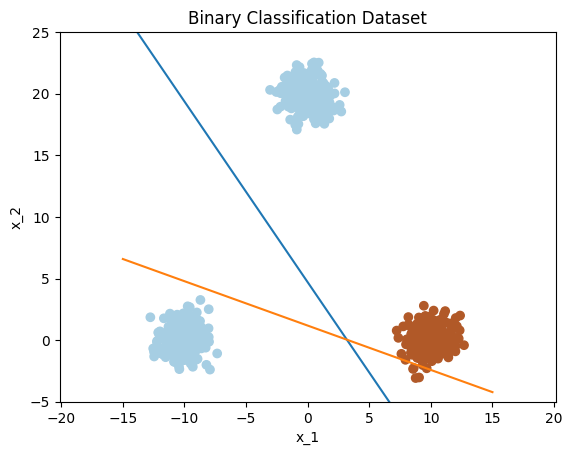

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.572114176628E+01  Residual=-.800000000000E+01
Ext.iteration=29  Objective=0.321106259005E+01  Residual=-.537850413409E+01
Start stage  1
Ext.iteration=0  Objective=0.111825608173E-12  Residual=-.537850413409E+01
Ext.iteration=38  Objective=-.418777079057E+02  Residual=-.297937179408E+03
Start stage  2
Ext.iteration=0  Objective=0.153688442147E-11  Residual=-.297937179408E+03
Ext.iteration=71  Objective=-.441323456040E+01  Residual=-.219317787706E+01
Start stage  3
Ext.iteration=0  Objective=0.150966023313E-11  Residual=-.219317787706E+01
Ext.iteration=53  Objective=-.567100819895E+00  Residual=-.170877042185E-02
Start stage  4
Ext.iteration=0  Objective=0.133335865768E-11  Residual=-.170877042185E-02
Ext.iteration=42  Objective=-.371040563717E-01  Residu

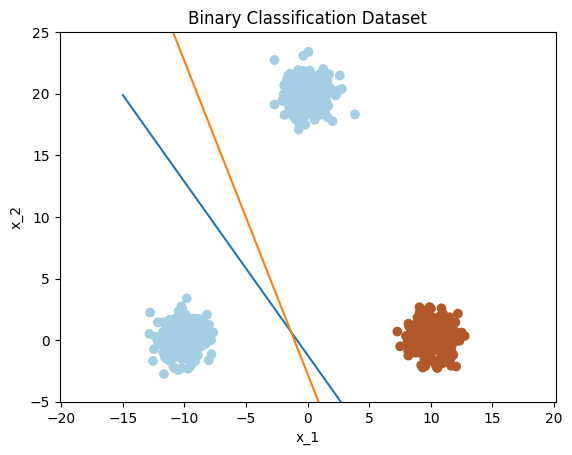

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.626289268472E+01  Residual=-.800000000000E+01
Ext.iteration=30  Objective=0.366596264282E+01  Residual=-.456946915076E+01
Start stage  1
Ext.iteration=0  Objective=0.135280548162E-12  Residual=-.456946915076E+01
Ext.iteration=24  Objective=-.492446929636E+02  Residual=-.235051388037E+03
Start stage  2
Ext.iteration=0  Objective=0.158615488538E-11  Residual=-.235051388037E+03
Ext.iteration=129  Objective=-.409448622270E+01  Residual=0.870414851306E-13
Start stage  3
Ext.iteration=0  Objective=0.148853808801E-11  Residual=0.870414851306E-13
Ext.iteration=42  Objective=-.331023316206E+00  Residual=-.846055842816E-04
Start stage  4
Ext.iteration=0  Objective=0.128433683274E-11  Residual=-.846055842816E-04
Ext.iteration=23

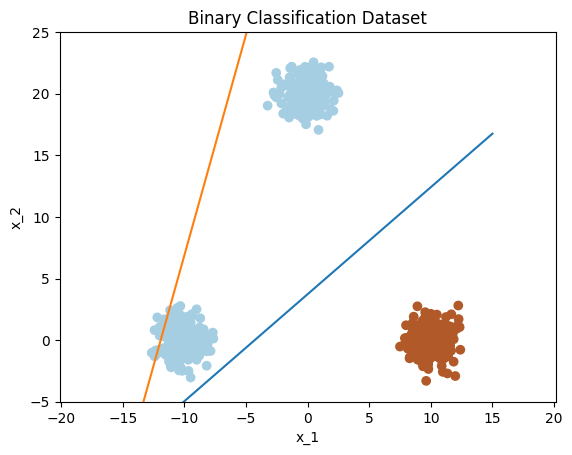

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.618927008199E+01  Residual=-.800000000000E+01
Ext.iteration=27  Objective=0.355720680472E+01  Residual=-.386229609998E+01
Start stage  1
Ext.iteration=0  Objective=0.123791105266E-12  Residual=-.386229609998E+01
Ext.iteration=26  Objective=-.339171330057E+02  Residual=-.172387893942E+03
Start stage  2
Ext.iteration=0  Objective=0.177139688582E-11  Residual=-.172387893942E+03
Ext.iteration=89  Objective=-.525309491475E+01  Residual=0.526061542772E-06
Start stage  3
Ext.iteration=0  Objective=0.169065226082E-11  Residual=0.526061542772E-06
Ext.iteration=77  Objective=-.532597827097E+00  Residual=0.664632562319E-06
Start stage  4
Ext.iteration=0  Objective=0.143872669324E-11  Residual=0.664632562319E-06
Ext.iteration=49  Objective=-.217974032577E-02  Residu

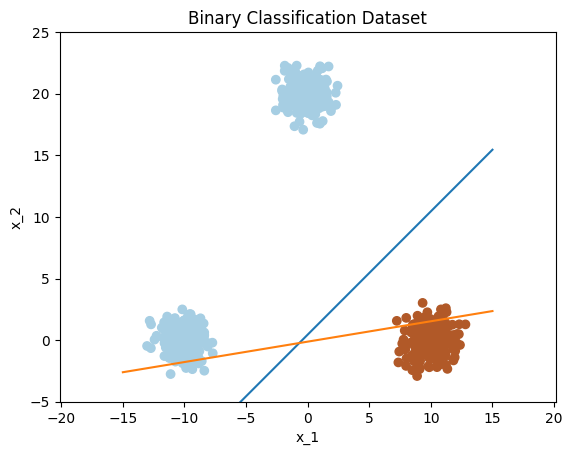

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.642631429405E+01  Residual=-.800000000000E+01
Ext.iteration=24  Objective=0.342011702006E+01  Residual=-.488883209294E+01
Start stage  1
Ext.iteration=0  Objective=0.105261665920E-12  Residual=-.488883209294E+01
Ext.iteration=48  Objective=-.327674321875E+02  Residual=0.113686837722E-12
Start stage  2
Ext.iteration=0  Objective=0.165366179876E-11  Residual=0.341060513165E-12
Ext.iteration=103  Objective=-.431448662685E+01  Residual=-.239709582737E+01
Start stage  3
Ext.iteration=0  Objective=0.154077419527E-11  Residual=-.239709582737E+01
Ext.iteration=46  Objective=-.416831286981E+00  Residual=-.211096588510E+01
Start stage  4
Ext.iteration=0  Objective=0.122971386927E-11  Residual=-.211096588510E+01
Ext.iteration=46  Objective=-.120969153197E+00  Resid

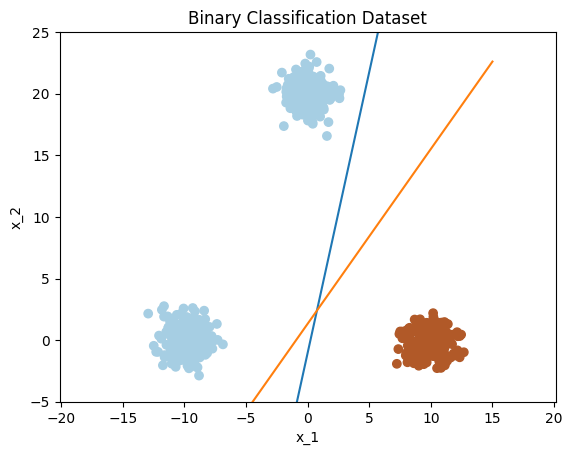

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.594104553685E+01  Residual=-.800000000000E+01
Ext.iteration=24  Objective=0.310111347685E+01  Residual=-.391077202716E+01
Start stage  1
Ext.iteration=0  Objective=0.106730599818E-12  Residual=-.391077202716E+01
Ext.iteration=57  Objective=-.340512160664E+02  Residual=-.309158303290E+02
Start stage  2
Ext.iteration=0  Objective=0.150012276250E-11  Residual=-.309158303290E+02
Ext.iteration=98  Objective=-.475666711985E+01  Residual=0.729013436285E-07
Start stage  3
Ext.iteration=0  Objective=0.176043065983E-11  Residual=0.729013436285E-07
Ext.iteration=57  Objective=-.353561172980E+00  Residual=-.101891984880E+01
Start stage  4
Ext.iteration=0  Objective=0.134049250445E-11  Residual=-.101891984880E+01
Ext.iteration=67  Objective=-.194991072637E-01  Residu

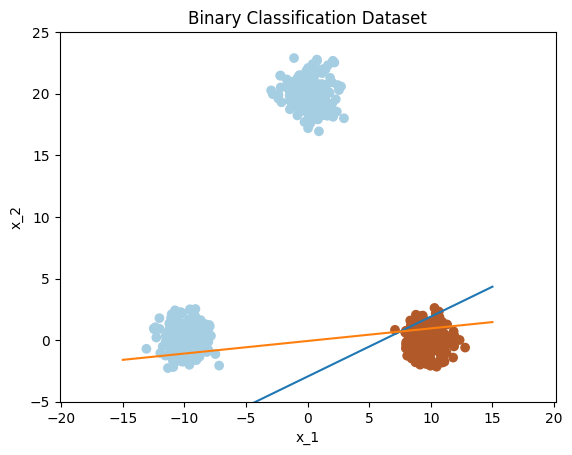

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.549347279428E+01  Residual=-.800000000000E+01
Ext.iteration=25  Objective=0.289745166741E+01  Residual=-.613093112792E+01
Start stage  1
Ext.iteration=0  Objective=0.887185311775E-13  Residual=-.613093112792E+01
Ext.iteration=68  Objective=-.315425354828E+02  Residual=-.101645408146E+03
Start stage  2
Ext.iteration=0  Objective=0.159607410633E-11  Residual=-.101645408146E+03
Ext.iteration=89  Objective=-.319009234974E+01  Residual=-.488212765134E-03
Start stage  3
Ext.iteration=0  Objective=0.127358322704E-11  Residual=-.488212765134E-03
Ext.iteration=76  Objective=-.173181473772E+00  Residual=-.308271136791E-02
Start stage  4
Ext.iteration=0  Objective=0.116541286783E-11  Residual=-.308271136791E-02
Ext.iteration=18 

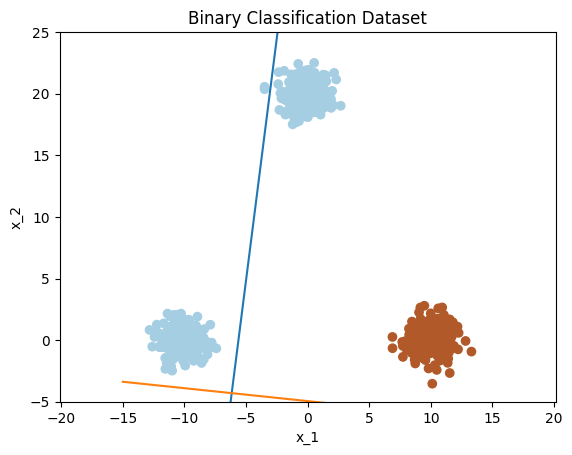

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.659254592382E+01  Residual=-.800000000000E+01
Ext.iteration=29  Objective=0.405972683706E+01  Residual=-.644064868158E+01
Start stage  1
Ext.iteration=0  Objective=0.147074742247E-12  Residual=-.644064868158E+01
Ext.iteration=39  Objective=-.521503207116E+02  Residual=0.568434188608E-13
Start stage  2
Ext.iteration=0  Objective=0.161185080359E-11  Residual=0.000000000000E+00
Ext.iteration=164  Objective=-.236141100789E+01  Residual=-.515568407592E-02
Start stage  3
Ext.iteration=0  Objective=0.174999907378E-11  Residual=-.515568407592E-02
Ext.iteration=74  Objective=-.147932076441E+00  Residual=-.629220273547E-03
Start stage  4
Ext.iteration=0  Objective=0.155651862034E-11  Residual=-.629220273533E-03
Ext.iteration=47

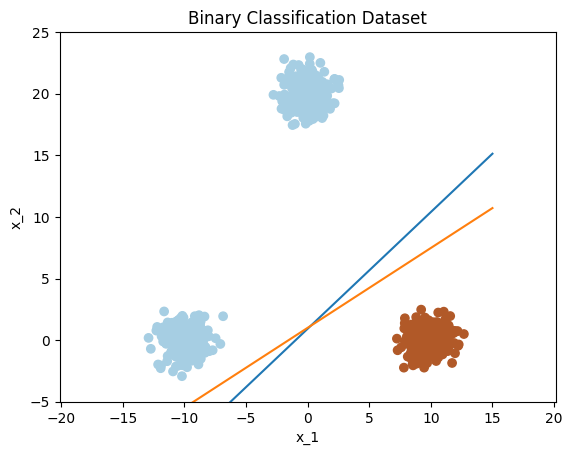

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.637854028428E+01  Residual=-.800000000000E+01
Ext.iteration=27  Objective=0.370813397993E+01  Residual=-.618913223762E+01
Start stage  1
Ext.iteration=0  Objective=0.124013003652E-12  Residual=-.618913223762E+01
Ext.iteration=45  Objective=-.455335320534E+02  Residual=-.220311442020E+03
Start stage  2
Ext.iteration=0  Objective=0.152891641985E-11  Residual=-.220311442020E+03
Ext.iteration=66  Objective=-.317324505667E+01  Residual=-.108614138569E+00
Start stage  3
Ext.iteration=0  Objective=0.144289585859E-11  Residual=-.108614138569E+00
Ext.iteration=44  Objective=-.170445680984E+00  Residual=-.106319410601E+01
Start stage  4
Ext.iteration=0  Objective=0.134478618488E-11  Residual=-.106319410601E+01
Ext.iteration=12  Objective=-.119398558084E-01  Residu

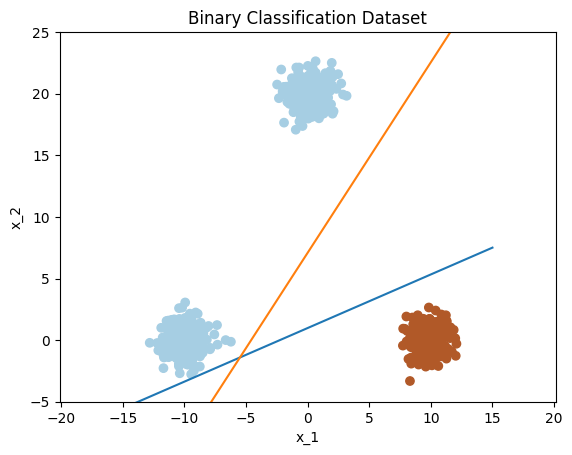

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.607976337893E+01  Residual=-.800000000000E+01
Ext.iteration=26  Objective=0.344682936046E+01  Residual=-.472055531137E+01
Start stage  1
Ext.iteration=0  Objective=0.121736465431E-12  Residual=-.472055531137E+01
Ext.iteration=33  Objective=-.394578361255E+02  Residual=-.237196125400E+03
Start stage  2
Ext.iteration=0  Objective=0.178124001940E-11  Residual=-.237196125400E+03
Ext.iteration=110  Objective=-.425307869487E+01  Residual=0.490416596222E-10
Start stage  3
Ext.iteration=0  Objective=0.166847395767E-11  Residual=0.490416596222E-10
Ext.iteration=53  Objective=-.395051069016E+00  Residual=0.568434188608E-13
Start stage  4
Ext.iteration=0  Objective=0.144917515120E-11  Residual=0.852651282912E-13
Ext.iteration=21

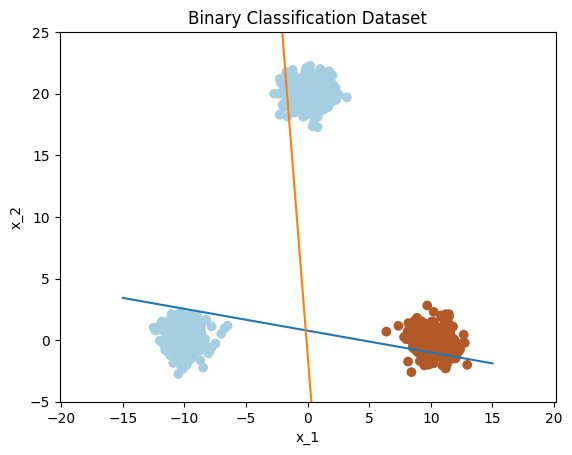

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.603076200436E+01  Residual=-.800000000000E+01
Ext.iteration=28  Objective=0.353094251035E+01  Residual=-.637151451437E+01
Start stage  1
Ext.iteration=0  Objective=0.121307198264E-12  Residual=-.637151451437E+01
Ext.iteration=45  Objective=-.424675525348E+02  Residual=0.341060513165E-12
Start stage  2
Ext.iteration=0  Objective=0.158538230818E-11  Residual=0.341060513165E-12
Ext.iteration=165  Objective=-.304520737691E+01  Residual=-.417443857259E-13
Start stage  3
Ext.iteration=0  Objective=0.132140840510E-11  Residual=-.417443857259E-13
Ext.iteration=50  Objective=-.123583689827E+00  Residual=-.337518761118E-05
Start stage  4
Ext.iteration=0  Objective=0.128648481926E-11  Residual=-.337518761118E-05
Ext.iteration=27

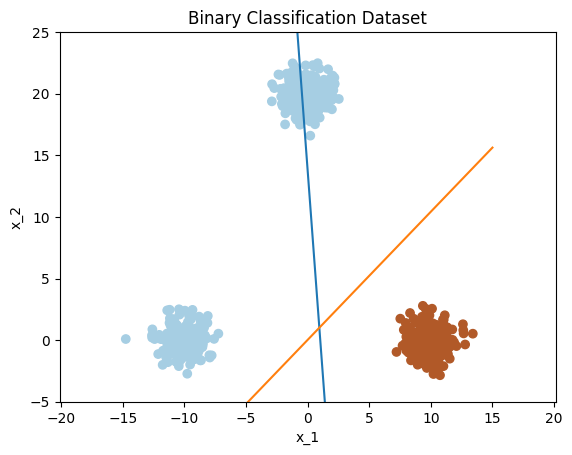

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.643403282785E+01  Residual=-.800000000000E+01
Ext.iteration=34  Objective=0.371742142441E+01  Residual=-.455191954664E+01
Start stage  1
Ext.iteration=0  Objective=0.137098859101E-12  Residual=-.455191954664E+01
Ext.iteration=50  Objective=-.299715947797E+02  Residual=-.386679622450E+03
Start stage  2
Ext.iteration=0  Objective=0.167745330217E-11  Residual=-.386679622450E+03
Ext.iteration=57  Objective=-.101334008752E+02  Residual=0.615540349358E-06
Start stage  3
Ext.iteration=0  Objective=0.192937270104E-11  Residual=0.615540320936E-06
Ext.iteration=51  Objective=-.680306306190E+00  Residual=-.197407579965E-01
Start stage  4
Ext.iteration=0  Objective=0.155152804572E-11  Residual=-.197407579965E-01
Ext.iteration=58 

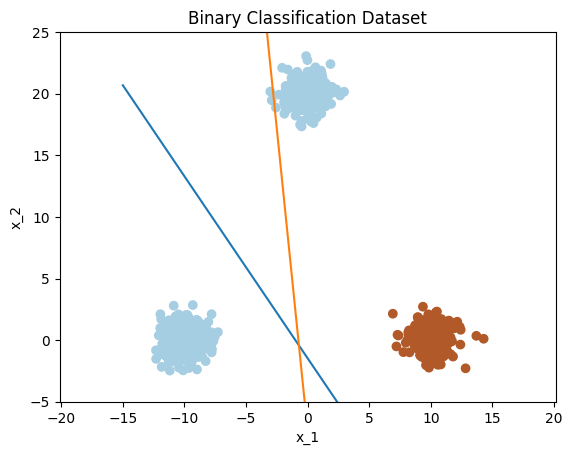

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.590485722561E+01  Residual=-.800000000000E+01
Ext.iteration=34  Objective=0.343347403290E+01  Residual=-.791215396065E+01
Start stage  1
Ext.iteration=0  Objective=0.182890363240E-12  Residual=-.791215396065E+01
Ext.iteration=46  Objective=-.488843519964E+02  Residual=-.282080210553E+03
Start stage  2
Ext.iteration=0  Objective=0.173250630246E-11  Residual=-.282080210553E+03
Ext.iteration=45  Objective=-.447098027566E+01  Residual=-.452797295509E-03
Start stage  3
Ext.iteration=0  Objective=0.139364857902E-11  Residual=-.452797295509E-03
Ext.iteration=42  Objective=-.571807796405E+00  Residual=-.124483631160E-03
Start stage  4
Ext.iteration=0  Objective=0.117407663501E-11  Residual=-.124483631160E-03
Ext.iteration=33  Objective=-.162653049643E-01  Residu

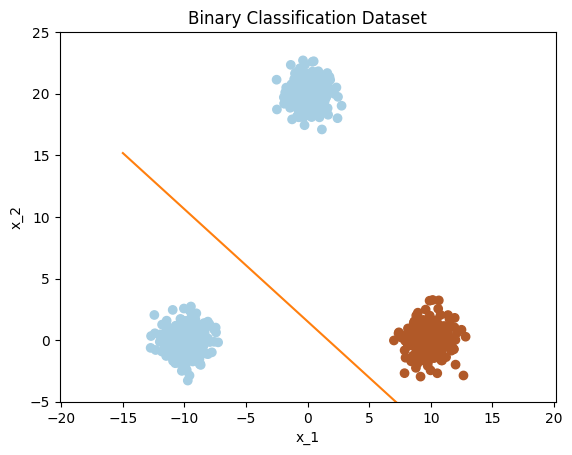

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.644491424356E+01  Residual=-.800000000000E+01
Ext.iteration=40  Objective=0.356319248226E+01  Residual=-.667983135334E+01
Start stage  1
Ext.iteration=0  Objective=0.122108386408E-12  Residual=-.667983135334E+01
Ext.iteration=28  Objective=-.470446773326E+02  Residual=-.220877034000E+03
Start stage  2
Ext.iteration=0  Objective=0.165212068219E-11  Residual=-.220877034000E+03
Ext.iteration=87  Objective=-.254334924975E+01  Residual=0.497872171934E-06
Start stage  3
Ext.iteration=0  Objective=0.172125372773E-11  Residual=0.497872171934E-06
Ext.iteration=54  Objective=-.582298750605E-01  Residual=-.130201917266E-04
Start stage  4
Ext.iteration=0  Objective=0.152437048814E-11  Residual=-.130201917408E-04
Ext.iteration=15  Objective=-.212175519943E-04  Residu

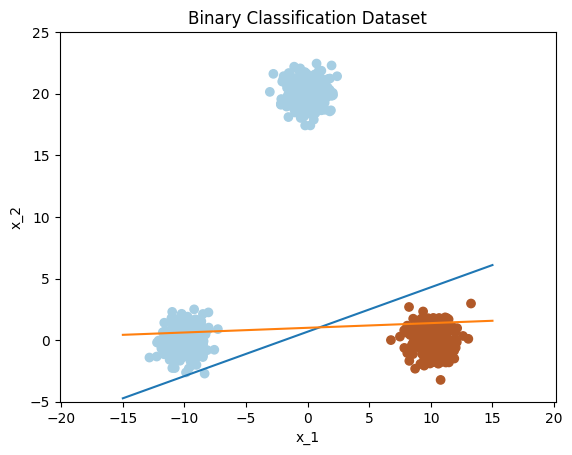

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.627658561696E+01  Residual=-.800000000000E+01
Ext.iteration=65  Objective=0.333917076987E+01  Residual=-.181166268237E+01
Start stage  1
Ext.iteration=0  Objective=0.148060574656E-12  Residual=-.181166268237E+01
Ext.iteration=25  Objective=-.417692432823E+02  Residual=-.262660516341E+03
Start stage  2
Ext.iteration=0  Objective=0.177026283274E-11  Residual=-.262660516341E+03
Ext.iteration=78  Objective=-.585610554699E+01  Residual=0.520250097225E-06
Start stage  3
Ext.iteration=0  Objective=0.186879364010E-11  Residual=0.520250097225E-06
Ext.iteration=43  Objective=-.675033147286E+00  Residual=0.694855630812E-06
Start stage  4
Ext.iteration=0  Objective=0.150302383384E-11  Residual=0.694855630812E-06
Ext.iteration=69  Objective=-.330586074467E-01  Residu

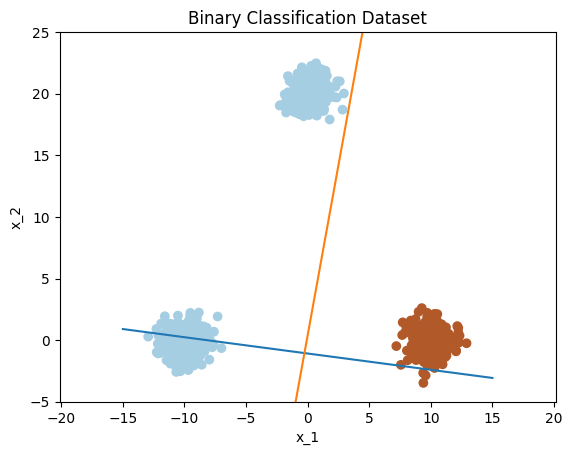

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.632778028683E+01  Residual=-.800000000000E+01
Ext.iteration=23  Objective=0.353731276561E+01  Residual=-.505558695093E+01
Start stage  1
Ext.iteration=0  Objective=0.126281053105E-12  Residual=-.505558695093E+01
Ext.iteration=35  Objective=-.376452649938E+02  Residual=0.170530256582E-12
Start stage  2
Ext.iteration=0  Objective=0.159458602513E-11  Residual=0.170530256582E-12
Ext.iteration=129  Objective=-.624435522361E+01  Residual=0.687017028156E-06
Start stage  3
Ext.iteration=0  Objective=0.192122266745E-11  Residual=0.687017035261E-06
Ext.iteration=71  Objective=-.223676382637E+00  Residual=-.397458557431E-01
Start stage  4
Ext.iteration=0  Objective=0.153499057826E-11  Residual=-.397458557431E-01
Ext.iteration=81

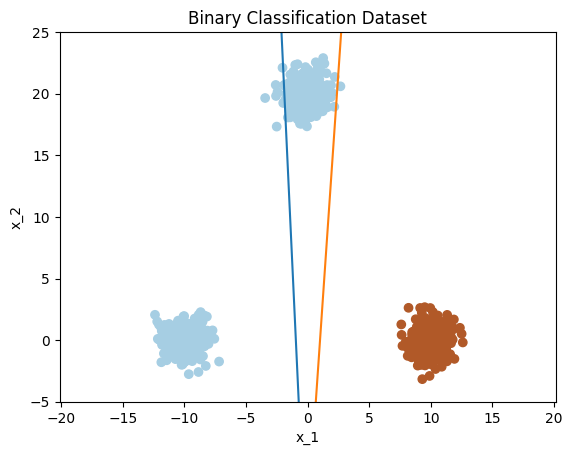

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.680165379473E+01  Residual=-.800000000000E+01
Ext.iteration=65  Objective=0.399414967849E+01  Residual=-.654171401363E+01
Start stage  1
Ext.iteration=0  Objective=0.165909046947E-12  Residual=-.654171401363E+01
Ext.iteration=21  Objective=-.577044990611E+02  Residual=-.113686837722E-12
Start stage  2
Ext.iteration=0  Objective=0.156220152325E-11  Residual=-.113686837722E-12
Ext.iteration=105  Objective=-.112494092763E+01  Residual=-.771127611387E-03
Start stage  3
Ext.iteration=0  Objective=0.143601572601E-11  Residual=-.771127611387E-03
Ext.iteration=67  Objective=-.322662924602E-01  Residual=-.320664143127E+00
Start stage  4
Ext.iteration=0  Objective=0.142730676279E-11  Residual=-.320664143127E+00
Ext.iteration=11

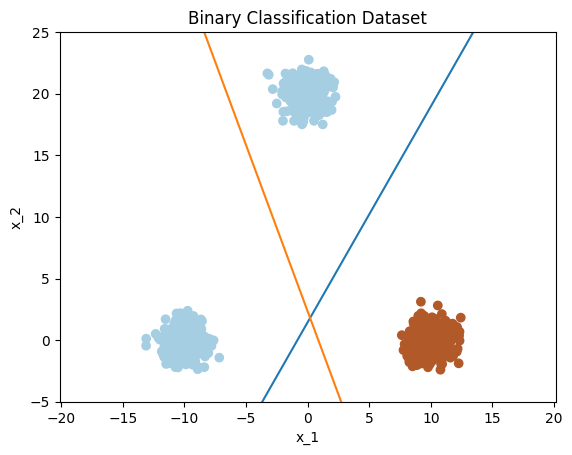

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.630616090242E+01  Residual=-.800000000000E+01
Ext.iteration=22  Objective=0.384441708690E+01  Residual=-.639521111443E+01
Start stage  1
Ext.iteration=0  Objective=0.126239711087E-12  Residual=-.639521111443E+01
Ext.iteration=47  Objective=-.432115843196E+02  Residual=-.668780439496E+02
Start stage  2
Ext.iteration=0  Objective=0.172990130033E-11  Residual=-.668780439496E+02
Ext.iteration=84  Objective=-.357574932346E+01  Residual=-.186646823077E-02
Start stage  3
Ext.iteration=0  Objective=0.161159438928E-11  Residual=-.186646823077E-02
Ext.iteration=49  Objective=-.463876916462E+00  Residual=-.514457052958E-06
Start stage  4
Ext.iteration=0  Objective=0.141091246828E-11  Residual=-.514457056511E-06
Ext.iteration=59  Objective=-.239248298814E+00  Residu

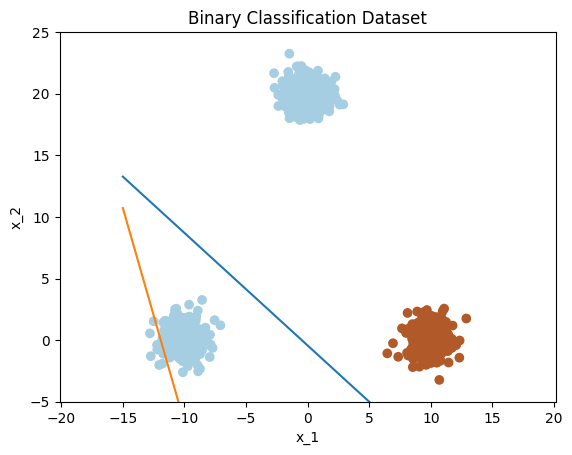

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.582970737713E+01  Residual=-.800000000000E+01
Ext.iteration=28  Objective=0.325499408701E+01  Residual=-.643253215367E+01
Start stage  1
Ext.iteration=0  Objective=0.989596345923E-13  Residual=-.643253215367E+01
Ext.iteration=54  Objective=-.329831391504E+02  Residual=-.246079889490E+03
Start stage  2
Ext.iteration=0  Objective=0.178701468728E-11  Residual=-.246079889490E+03
Ext.iteration=90  Objective=-.313908396157E+01  Residual=0.115206145068E-06
Start stage  3
Ext.iteration=0  Objective=0.164730311746E-11  Residual=0.115206145068E-06
Ext.iteration=52  Objective=-.307697567562E+00  Residual=-.254335365604E-04
Start stage  4
Ext.iteration=0  Objective=0.129103213501E-11  Residual=-.254335365604E-04
Ext.iteration=31  Objective=-.826274373530E-02  Residu

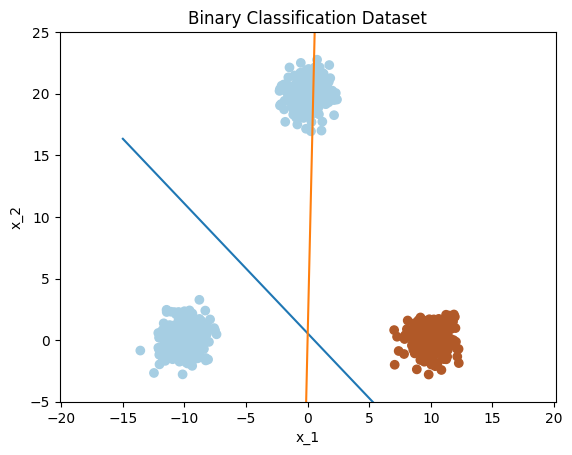

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.561092997754E+01  Residual=-.800000000000E+01
Ext.iteration=23  Objective=0.312847764620E+01  Residual=-.572298302944E+01
Start stage  1
Ext.iteration=0  Objective=0.101654899124E-12  Residual=-.572298302944E+01
Ext.iteration=31  Objective=-.324186096709E+02  Residual=-.294189923690E+03
Start stage  2
Ext.iteration=0  Objective=0.154307357395E-11  Residual=-.294189923690E+03
Ext.iteration=69  Objective=-.426240003577E+01  Residual=-.559719724599E+01
Start stage  3
Ext.iteration=0  Objective=0.153622559681E-11  Residual=-.559719724599E+01
Ext.iteration=47  Objective=-.572299190580E+00  Residual=-.875050405289E+01
Start stage  4
Ext.iteration=0  Objective=0.128667734033E-11  Residual=-.875050405289E+01
Ext.iteration=13 

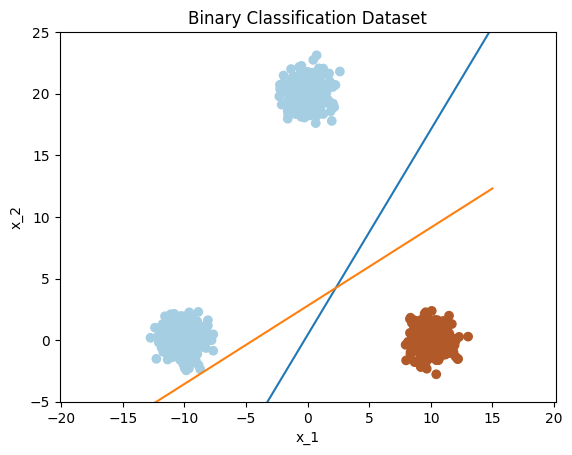

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.648168561497E+01  Residual=-.800000000000E+01
Ext.iteration=23  Objective=0.363824316400E+01  Residual=-.563995865133E+01
Start stage  1
Ext.iteration=0  Objective=0.121336846129E-12  Residual=-.563995865133E+01
Ext.iteration=30  Objective=-.431708383872E+02  Residual=-.247603322750E+03
Start stage  2
Ext.iteration=0  Objective=0.167157198533E-11  Residual=-.247603322750E+03
Ext.iteration=75  Objective=-.329023157971E+01  Residual=0.459152538212E-08
Start stage  3
Ext.iteration=0  Objective=0.138069367326E-11  Residual=0.459152538212E-08
Ext.iteration=32  Objective=-.902159193890E-01  Residual=0.529347897071E-06
Start stage  4
Ext.iteration=0  Objective=0.130003852213E-11  Residual=0.529347897071E-06
Ext.iteration=20 

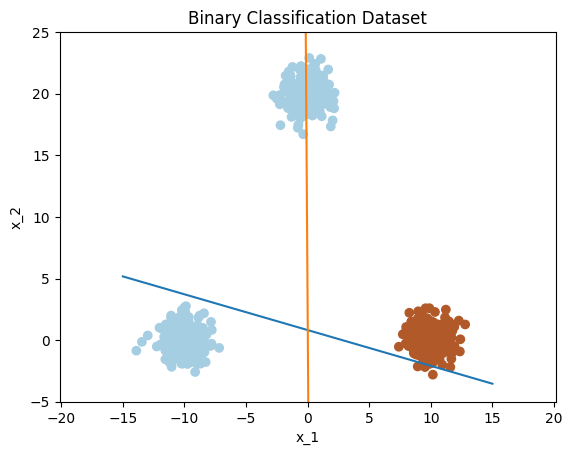

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.609449110974E+01  Residual=-.800000000000E+01
Ext.iteration=43  Objective=0.342704001849E+01  Residual=-.562076123340E+01
Start stage  1
Ext.iteration=0  Objective=0.110271794123E-12  Residual=-.562076123340E+01
Ext.iteration=30  Objective=-.401799125145E+02  Residual=0.142108547152E-12
Start stage  2
Ext.iteration=0  Objective=0.153131865390E-11  Residual=0.255795384874E-12
Ext.iteration=107  Objective=-.360824545551E+01  Residual=0.112368010008E-06
Start stage  3
Ext.iteration=0  Objective=0.134003803688E-11  Residual=0.112368006455E-06
Ext.iteration=35  Objective=-.136197990921E+00  Residual=-.242893705244E+00
Start stage  4
Ext.iteration=0  Objective=0.120505744674E-11  Residual=-.242893705244E+00
Ext.iteration=28  Objective=-.409987355931E-02  Resid

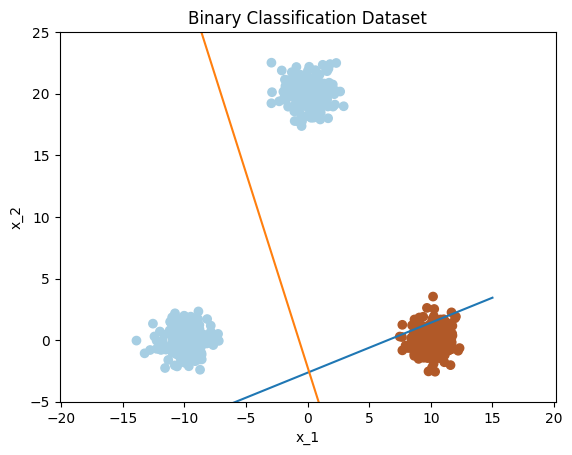

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.604703267581E+01  Residual=-.800000000000E+01
Ext.iteration=44  Objective=0.363950625103E+01  Residual=-.435446552121E+01
Start stage  1
Ext.iteration=0  Objective=0.128335233660E-12  Residual=-.435446552121E+01
Ext.iteration=47  Objective=-.371768818898E+02  Residual=0.534328137292E-11
Start stage  2
Ext.iteration=0  Objective=0.169480235444E-11  Residual=0.511590769747E-11
Ext.iteration=107  Objective=-.796289455097E+01  Residual=0.299099466972E-06
Start stage  3
Ext.iteration=0  Objective=0.183327133739E-11  Residual=0.299099466972E-06
Ext.iteration=53  Objective=-.406831964213E+00  Residual=-.910634931020E+01
Start stage  4
Ext.iteration=0  Objective=0.145325078028E-11  Residual=-.910634931020E+01
Ext.iteration=60  Objective=-.219450162401E+00  Resid

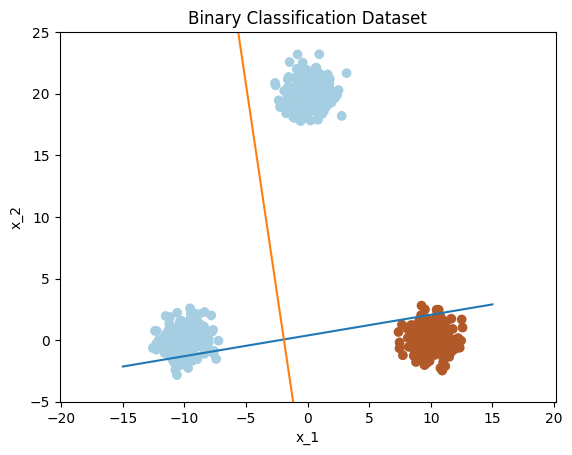

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.577481433731E+01  Residual=-.800000000000E+01
Ext.iteration=31  Objective=0.334163273440E+01  Residual=-.573524666052E+01
Start stage  1
Ext.iteration=0  Objective=0.105325189002E-12  Residual=-.573524666052E+01
Ext.iteration=44  Objective=-.361080649673E+02  Residual=-.169886143034E+03
Start stage  2
Ext.iteration=0  Objective=0.168716708444E-11  Residual=-.169886143034E+03
Ext.iteration=109  Objective=-.452533768842E+01  Residual=0.458909056533E-06
Start stage  3
Ext.iteration=0  Objective=0.167935556781E-11  Residual=0.458909056533E-06
Ext.iteration=54  Objective=-.234748226990E+00  Residual=-.732235585383E+00
Start stage  4
Ext.iteration=0  Objective=0.155588282918E-11  Residual=-.732235585383E+00
Ext.iteration=48  Objective=-.550307221260E-01  Resid

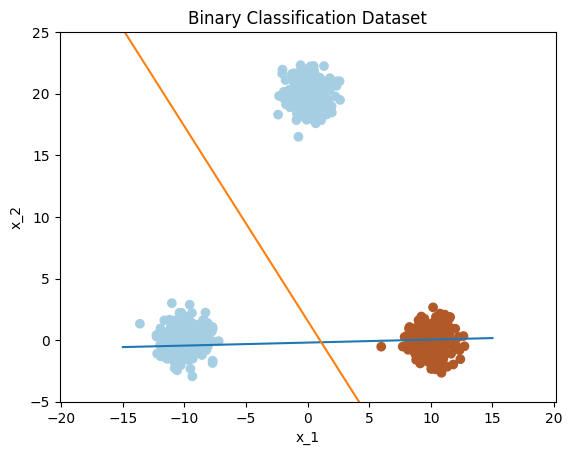

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.608585539509E+01  Residual=-.800000000000E+01
Ext.iteration=24  Objective=0.337722183178E+01  Residual=-.664108314626E+01
Start stage  1
Ext.iteration=0  Objective=0.109481313759E-12  Residual=-.664108314626E+01
Ext.iteration=29  Objective=-.414977650815E+02  Residual=-.248503431511E+03
Start stage  2
Ext.iteration=0  Objective=0.166424825511E-11  Residual=-.248503431511E+03
Ext.iteration=109  Objective=-.320975360543E+01  Residual=-.426325641456E-13
Start stage  3
Ext.iteration=0  Objective=0.179095820551E-11  Residual=-.426325641456E-13
Ext.iteration=51  Objective=-.250095341844E+00  Residual=-.566301902962E-04
Start stage  4
Ext.iteration=0  Objective=0.145228580538E-11  Residual=-.566301902962E-04
Ext.iteration=25  Objective=-.114405463420E-02  Resid

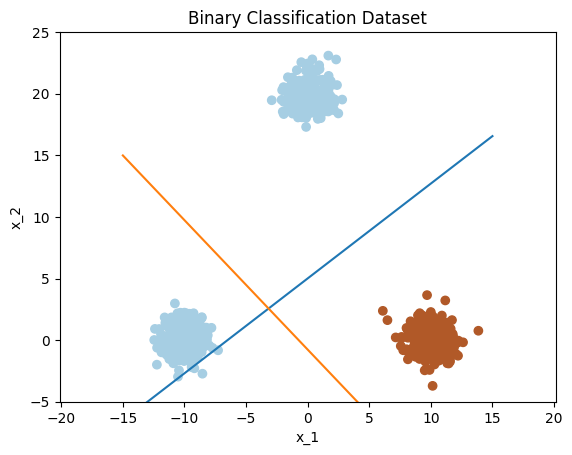

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.617554191368E+01  Residual=-.800000000000E+01
Ext.iteration=39  Objective=0.386058986431E+01  Residual=-.436521159345E+01
Start stage  1
Ext.iteration=0  Objective=0.121149130136E-12  Residual=-.436521159345E+01
Ext.iteration=25  Objective=-.372543300712E+02  Residual=-.185002104960E+03
Start stage  2
Ext.iteration=0  Objective=0.155156663270E-11  Residual=-.185002104960E+03
Ext.iteration=99  Objective=-.578003461964E+01  Residual=0.545799151652E-06
Start stage  3
Ext.iteration=0  Objective=0.172583252680E-11  Residual=0.545799151652E-06
Ext.iteration=52  Objective=-.514645365556E+00  Residual=0.289115291707E-07
Start stage  4
Ext.iteration=0  Objective=0.137695622267E-11  Residual=0.289115291707E-07
Ext.iteration=52  Objective=-.337402810427E-02  Residu

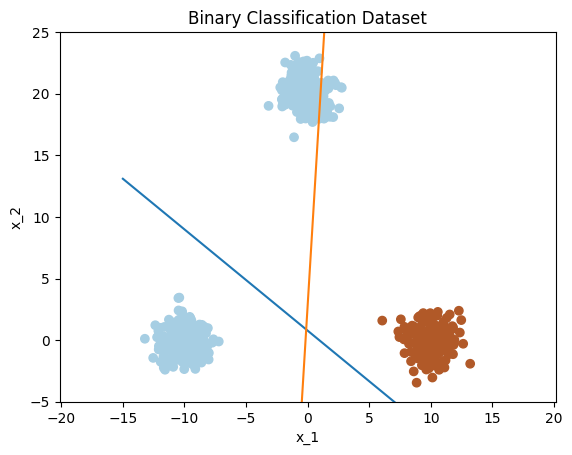

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.598431438903E+01  Residual=-.800000000000E+01
Ext.iteration=24  Objective=0.338278807716E+01  Residual=-.686282435294E+01
Start stage  1
Ext.iteration=0  Objective=0.107068593936E-12  Residual=-.686282435294E+01
Ext.iteration=61  Objective=-.398364112300E+02  Residual=-.259591191729E+03
Start stage  2
Ext.iteration=0  Objective=0.167732266982E-11  Residual=-.259591191729E+03
Ext.iteration=91  Objective=-.286484929737E+01  Residual=-.324695214051E+01
Start stage  3
Ext.iteration=0  Objective=0.142444522068E-11  Residual=-.324695214051E+01
Ext.iteration=52  Objective=-.139966582730E+00  Residual=-.467091525161E+00
Start stage  4
Ext.iteration=0  Objective=0.116957569907E-11  Residual=-.467091525161E+00
Ext.iteration=81  Objective=-.913282462621E-02  Residu

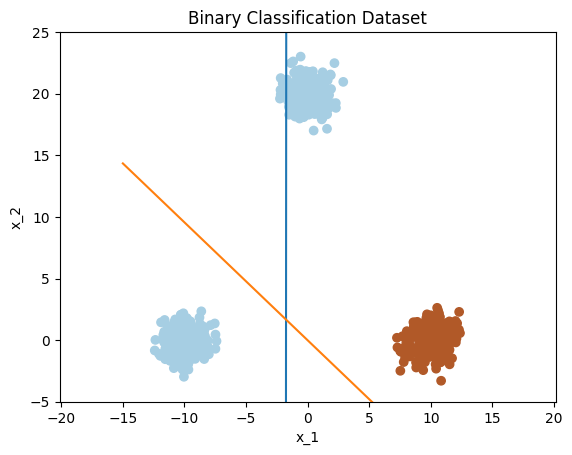

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.677165944923E+01  Residual=-.800000000000E+01
Ext.iteration=26  Objective=0.360786783461E+01  Residual=-.628603200252E+01
Start stage  1
Ext.iteration=0  Objective=0.128861781444E-12  Residual=-.628603200252E+01
Ext.iteration=64  Objective=-.423734727312E+02  Residual=-.132495049431E+03
Start stage  2
Ext.iteration=0  Objective=0.162308131547E-11  Residual=-.132495049431E+03
Ext.iteration=119  Objective=-.351653236546E+01  Residual=0.559707853398E-06
Start stage  3
Ext.iteration=0  Objective=0.164534845308E-11  Residual=0.559707853398E-06
Ext.iteration=53  Objective=-.555348121254E+00  Residual=-.110943420526E+02
Start stage  4
Ext.iteration=0  Objective=0.130028583634E-11  Residual=-.110943420526E+02
Ext.iteration=60  Objective=-.221908578690E+00  Resid

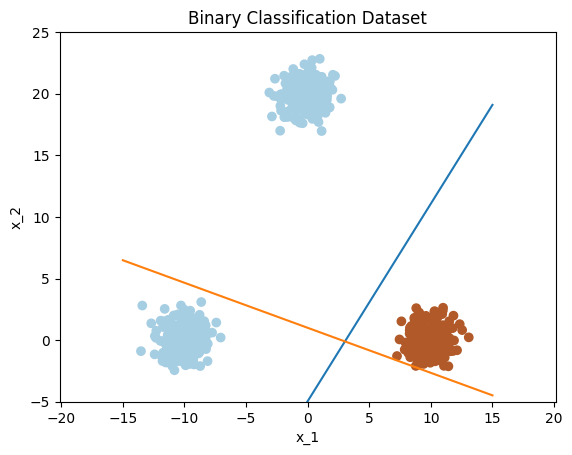

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.581697324400E+01  Residual=-.800000000000E+01
Ext.iteration=28  Objective=0.336925134307E+01  Residual=-.642204155619E+01
Start stage  1
Ext.iteration=0  Objective=0.116004738233E-12  Residual=-.642204155619E+01
Ext.iteration=37  Objective=-.455559778705E+02  Residual=-.208326020490E+03
Start stage  2
Ext.iteration=0  Objective=0.184109705837E-11  Residual=-.208326020490E+03
Ext.iteration=68  Objective=-.327325646305E+01  Residual=-.639488462184E-13
Start stage  3
Ext.iteration=0  Objective=0.140114206854E-11  Residual=-.639488462184E-13
Ext.iteration=49  Objective=-.611622229134E-01  Residual=-.549257190201E-04
Start stage  4
Ext.iteration=0  Objective=0.136560184870E-11  Residual=-.549257190201E-04
Ext.iteration=30  Objective=-.137889176281E-03  Residu

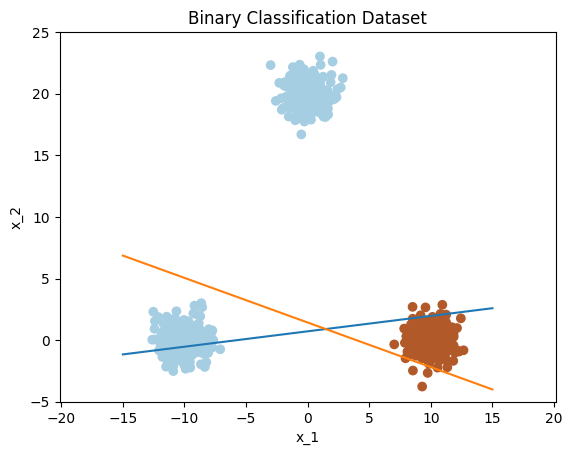

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.624577112687E+01  Residual=-.800000000000E+01
Ext.iteration=35  Objective=0.331919047407E+01  Residual=-.455629391300E+01
Start stage  1
Ext.iteration=0  Objective=0.121839158722E-12  Residual=-.455629391300E+01
Ext.iteration=57  Objective=-.350818176554E+02  Residual=-.257074824130E+02
Start stage  2
Ext.iteration=0  Objective=0.186656167543E-11  Residual=-.257074824130E+02
Ext.iteration=68  Objective=-.548487252660E+01  Residual=0.186993464268E-06
Start stage  3
Ext.iteration=0  Objective=0.192171718390E-11  Residual=0.186993464268E-06
Ext.iteration=37  Objective=-.805354208624E+00  Residual=-.475486720060E-04
Start stage  4
Ext.iteration=0  Objective=0.137676382942E-11  Residual=-.475486720060E-04
Ext.iteration=46 

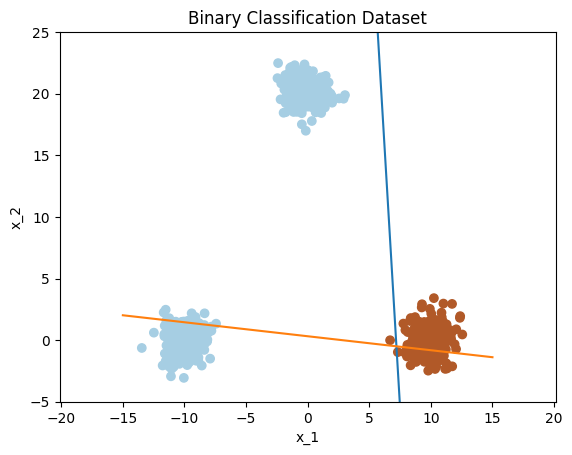

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.562737554253E+01  Residual=-.800000000000E+01
Ext.iteration=25  Objective=0.333986482639E+01  Residual=-.596406733137E+01
Start stage  1
Ext.iteration=0  Objective=0.109396666285E-12  Residual=-.596406733137E+01
Ext.iteration=41  Objective=-.363945125905E+02  Residual=-.230698357261E+03
Start stage  2
Ext.iteration=0  Objective=0.149304493629E-11  Residual=-.230698357261E+03
Ext.iteration=92  Objective=-.327056501433E+01  Residual=0.240569020704E-06
Start stage  3
Ext.iteration=0  Objective=0.140665917289E-11  Residual=0.240569020704E-06
Ext.iteration=27  Objective=-.551418644202E-01  Residual=0.386760737214E-06
Start stage  4
Ext.iteration=0  Objective=0.128074063566E-11  Residual=0.386760737214E-06
Ext.iteration=50  Objective=-.633773273755E-03  Residu

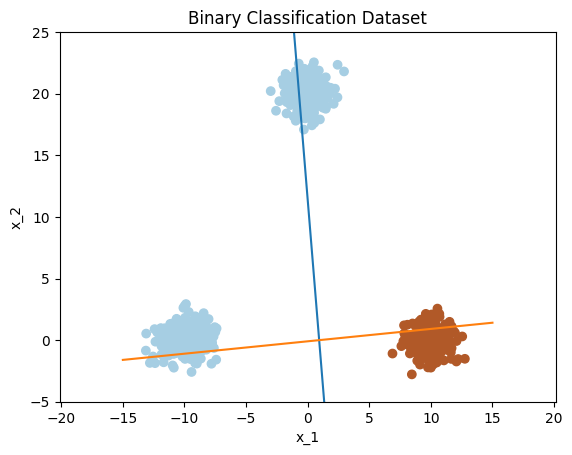

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.620978178195E+01  Residual=-.800000000000E+01
Ext.iteration=33  Objective=0.359090269653E+01  Residual=-.443529597717E+01
Start stage  1
Ext.iteration=0  Objective=0.126578389468E-12  Residual=-.443529597717E+01
Ext.iteration=41  Objective=-.368268523192E+02  Residual=-.568434188608E-13
Start stage  2
Ext.iteration=0  Objective=0.172055400588E-11  Residual=0.568434188608E-13
Ext.iteration=107  Objective=-.545908383332E+01  Residual=0.119511604169E-06
Start stage  3
Ext.iteration=0  Objective=0.181523844156E-11  Residual=0.119511604169E-06
Ext.iteration=82  Objective=-.792471797015E+00  Residual=0.722657489405E-10
Start stage  4
Ext.iteration=0  Objective=0.150346361473E-11  Residual=0.722657489405E-10
Ext.iteration=67  Objective=-.187323183805E-01  Resid

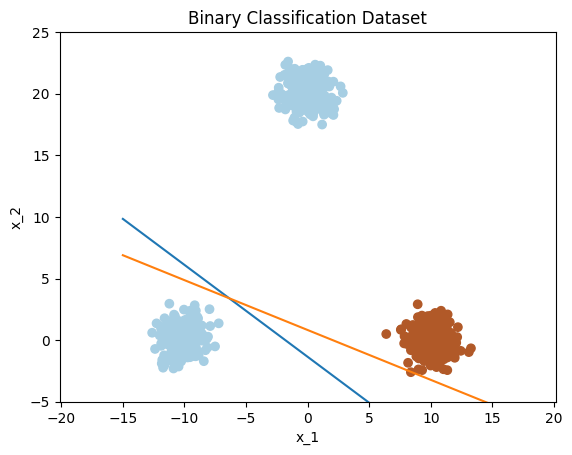

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.618786643689E+01  Residual=-.800000000000E+01
Ext.iteration=27  Objective=0.359655023820E+01  Residual=-.638996289676E+01
Start stage  1
Ext.iteration=0  Objective=0.120668663502E-12  Residual=-.638996289676E+01
Ext.iteration=30  Objective=-.391296981866E+02  Residual=-.568434188608E-13
Start stage  2
Ext.iteration=0  Objective=0.173976810912E-11  Residual=0.227373675443E-12
Ext.iteration=125  Objective=-.425465287801E+01  Residual=-.282049482465E-02
Start stage  3
Ext.iteration=0  Objective=0.121921534129E-11  Residual=-.282049482465E-02
Ext.iteration=41  Objective=-.152855021506E+00  Residual=-.169708088619E-02
Start stage  4
Ext.iteration=0  Objective=0.129196316642E-11  Residual=-.169708088619E-02
Ext.iteration=46  Objective=-.327156505596E-03  Resid

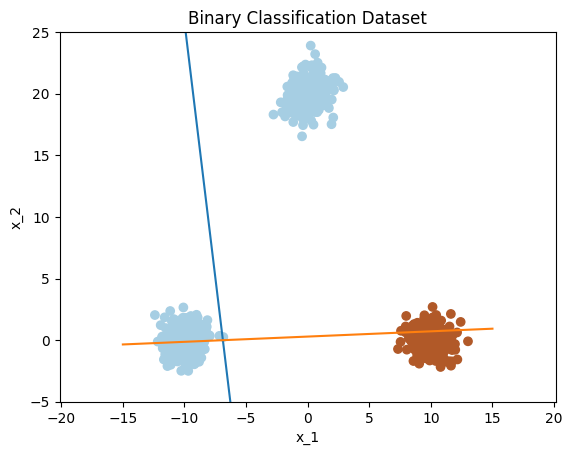

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.663700755962E+01  Residual=-.800000000000E+01
Ext.iteration=28  Objective=0.368226073110E+01  Residual=-.394765901993E+01
Start stage  1
Ext.iteration=0  Objective=0.139874238222E-12  Residual=-.394765901993E+01
Ext.iteration=40  Objective=-.335311568596E+02  Residual=0.113686837722E-12
Start stage  2
Ext.iteration=0  Objective=0.164447447655E-11  Residual=0.113686837722E-12
Ext.iteration=109  Objective=-.107765584131E+02  Residual=0.666077758282E-06
Start stage  3
Ext.iteration=0  Objective=0.183944387868E-11  Residual=0.666077758282E-06
Ext.iteration=54  Objective=-.557867065532E+00  Residual=-.200702513541E+02
Start stage  4
Ext.iteration=0  Objective=0.153108333654E-11  Residual=-.200702513541E+02
Ext.iteration=67  Objective=-.773321134747E+00  Resid

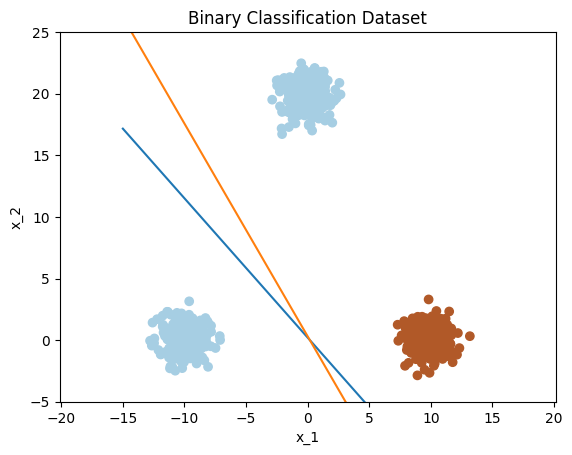

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.589317782666E+01  Residual=-.800000000000E+01
Ext.iteration=32  Objective=0.365427789098E+01  Residual=-.605608716405E+01
Start stage  1
Ext.iteration=0  Objective=0.133924185628E-12  Residual=-.605608716405E+01
Ext.iteration=30  Objective=-.467654178845E+02  Residual=0.000000000000E+00
Start stage  2
Ext.iteration=0  Objective=0.171782417073E-11  Residual=0.000000000000E+00
Ext.iteration=123  Objective=-.393159165158E+01  Residual=0.131101483447E-06
Start stage  3
Ext.iteration=0  Objective=0.175973005954E-11  Residual=0.131101478118E-06
Ext.iteration=57  Objective=-.391285504043E+00  Residual=-.344984433399E+00
Start stage  4
Ext.iteration=0  Objective=0.143340369218E-11  Residual=-.344984433399E+00
Ext.iteration=53  Objective=-.104890264984E-01  Resid

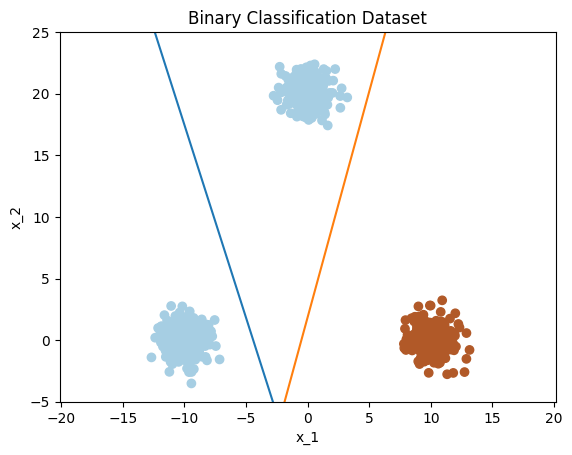

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.666226674333E+01  Residual=-.800000000000E+01
Ext.iteration=25  Objective=0.357880379676E+01  Residual=-.587094052249E+01
Start stage  1
Ext.iteration=0  Objective=0.122820914229E-12  Residual=-.587094052249E+01
Ext.iteration=50  Objective=-.353959130566E+02  Residual=-.185507370086E+03
Start stage  2
Ext.iteration=0  Objective=0.182469555788E-11  Residual=-.185507370086E+03
Ext.iteration=71  Objective=-.551654491233E+01  Residual=-.377076563495E-03
Start stage  3
Ext.iteration=0  Objective=0.180079454498E-11  Residual=-.377076563495E-03
Ext.iteration=58  Objective=-.603044037405E+00  Residual=-.562271959217E+00
Start stage  4
Ext.iteration=0  Objective=0.155159706656E-11  Residual=-.562271959217E+00
Ext.iteration=60  Objective=-.362782063055E-01  Residu

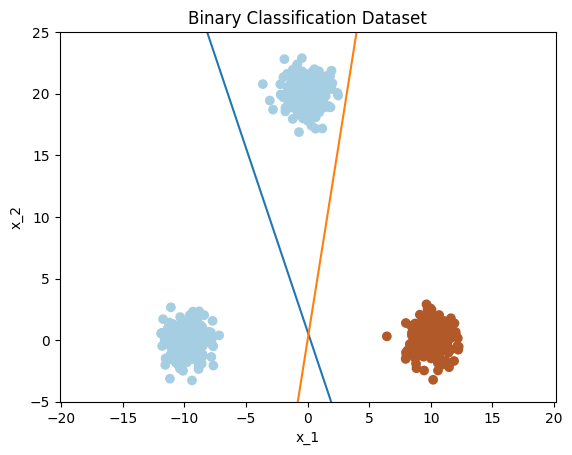

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.606062519166E+01  Residual=-.800000000000E+01
Ext.iteration=25  Objective=0.335896371422E+01  Residual=-.474174048272E+01
Start stage  1
Ext.iteration=0  Objective=0.110286654730E-12  Residual=-.474174048272E+01
Ext.iteration=41  Objective=-.315016667790E+02  Residual=-.274296718729E+03
Start stage  2
Ext.iteration=0  Objective=0.179614542185E-11  Residual=-.274296718729E+03
Ext.iteration=76  Objective=-.589539384810E+01  Residual=-.637939113548E+01
Start stage  3
Ext.iteration=0  Objective=0.136192383138E-11  Residual=-.637939113548E+01
Ext.iteration=30  Objective=-.740576157882E+00  Residual=-.703244856843E-02
Start stage  4
Ext.iteration=0  Objective=0.124108048992E-11  Residual=-.703244856843E-02
Ext.iteration=53  Objective=-.420549490023E-01  Residu

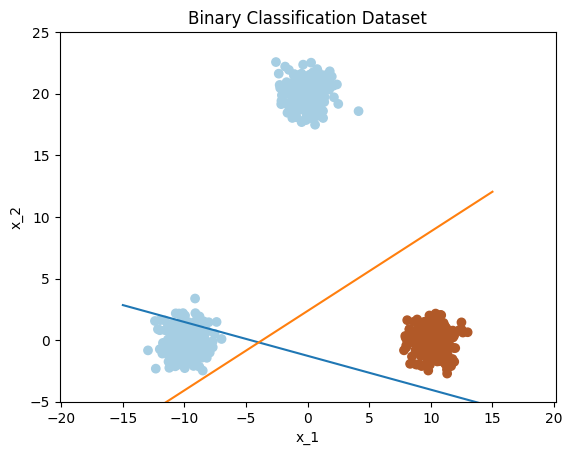

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.620011567925E+01  Residual=-.800000000000E+01
Ext.iteration=25  Objective=0.361458584855E+01  Residual=-.513896474557E+01
Start stage  1
Ext.iteration=0  Objective=0.108564646123E-12  Residual=-.513896474557E+01
Ext.iteration=31  Objective=-.322740853712E+02  Residual=-.315794897533E+03
Start stage  2
Ext.iteration=0  Objective=0.184842114009E-11  Residual=-.315794897533E+03
Ext.iteration=86  Objective=-.752175040473E+01  Residual=-.141070163022E+01
Start stage  3
Ext.iteration=0  Objective=0.175932514091E-11  Residual=-.141070163022E+01
Ext.iteration=45  Objective=-.928392566408E+00  Residual=-.742863760974E-01
Start stage  4
Ext.iteration=0  Objective=0.143113725566E-11  Residual=-.742863760974E-01
Ext.iteration=63  Objective=-.342614438653E+00  Residu

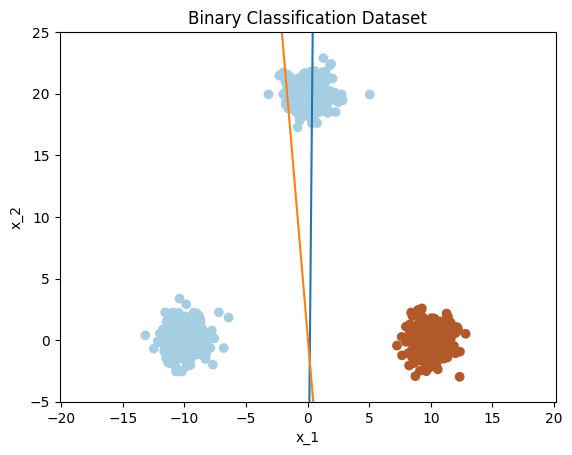

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.644304979358E+01  Residual=-.800000000000E+01
Ext.iteration=28  Objective=0.380956512218E+01  Residual=-.588146791484E+01
Start stage  1
Ext.iteration=0  Objective=0.131139636029E-12  Residual=-.588146791484E+01
Ext.iteration=48  Objective=-.403336886155E+02  Residual=-.267462470346E+03
Start stage  2
Ext.iteration=0  Objective=0.180712016316E-11  Residual=-.267462470346E+03
Ext.iteration=74  Objective=-.523558815615E+01  Residual=-.177388568928E+01
Start stage  3
Ext.iteration=0  Objective=0.156204002962E-11  Residual=-.177388568928E+01
Ext.iteration=69  Objective=-.531415341156E+00  Residual=-.410771314916E-03
Start stage  4
Ext.iteration=0  Objective=0.129016175893E-11  Residual=-.410771314916E-03
Ext.iteration=46  Objective=-.916423646764E-02  Residu

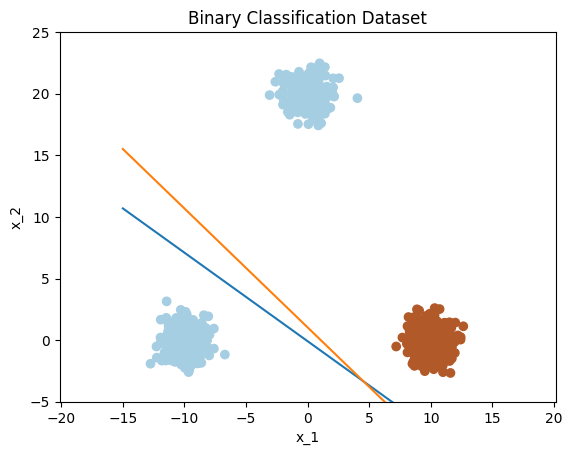

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.627036339696E+01  Residual=-.800000000000E+01
Ext.iteration=56  Objective=0.380500312235E+01  Residual=-.649964684559E+01
Start stage  1
Ext.iteration=0  Objective=0.132126704444E-12  Residual=-.649964684559E+01
Ext.iteration=51  Objective=-.475803706021E+02  Residual=-.201594019952E+03
Start stage  2
Ext.iteration=0  Objective=0.174992355939E-11  Residual=-.201594019952E+03
Ext.iteration=47  Objective=-.342984972453E+01  Residual=-.148657015746E-02
Start stage  3
Ext.iteration=0  Objective=0.184252980032E-11  Residual=-.148657015746E-02
Ext.iteration=58  Objective=-.347218997166E+00  Residual=-.672196047478E-03
Start stage  4
Ext.iteration=0  Objective=0.155253033441E-11  Residual=-.672196047478E-03
Ext.iteration=82 

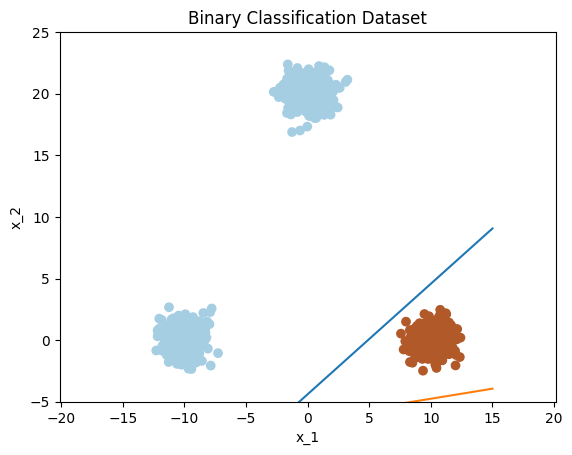

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.682251509541E+01  Residual=-.800000000000E+01
Ext.iteration=25  Objective=0.325676455241E+01  Residual=-.270518663258E+01
Start stage  1
Ext.iteration=0  Objective=0.102319994338E-12  Residual=-.270518663258E+01
Ext.iteration=48  Objective=-.235809138821E+02  Residual=-.292349841196E+03
Start stage  2
Ext.iteration=0  Objective=0.174403562152E-11  Residual=-.292349841196E+03
Ext.iteration=85  Objective=-.854900652757E+01  Residual=0.000000000000E+00
Start stage  3
Ext.iteration=0  Objective=0.174472795061E-11  Residual=-.710542735760E-14
Ext.iteration=52  Objective=-.733973769836E+00  Residual=-.561658651196E+01
Start stage  4
Ext.iteration=0  Objective=0.132644257002E-11  Residual=-.561658651196E+01
Ext.iteration=39  Objective=-.258839101951E+00  Residu

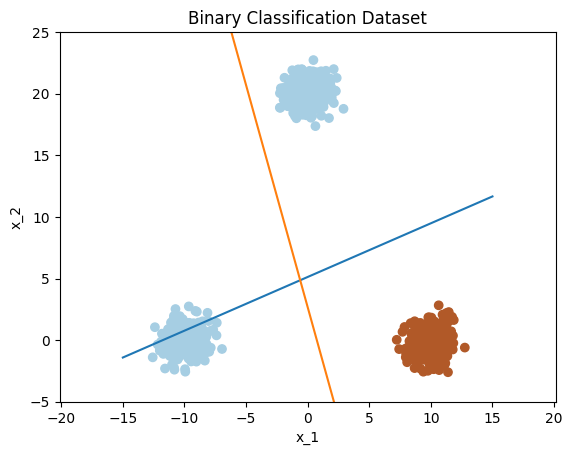

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.593081401772E+01  Residual=-.800000000000E+01
Ext.iteration=32  Objective=0.312251731595E+01  Residual=-.598982494978E+01
Start stage  1
Ext.iteration=0  Objective=0.102683237577E-12  Residual=-.598982494978E+01
Ext.iteration=38  Objective=-.311828533351E+02  Residual=-.185426031726E+03
Start stage  2
Ext.iteration=0  Objective=0.148207800355E-11  Residual=-.185426031726E+03
Ext.iteration=134  Objective=-.298386682284E+01  Residual=-.218954477541E-03
Start stage  3
Ext.iteration=0  Objective=0.133917191871E-11  Residual=-.218954477541E-03
Ext.iteration=45  Objective=-.112735775909E+00  Residual=-.541301513995E+00
Start stage  4
Ext.iteration=0  Objective=0.124936150245E-11  Residual=-.541301513995E+00
Ext.iteration=11  Objective=-.384959284019E-02  Resid

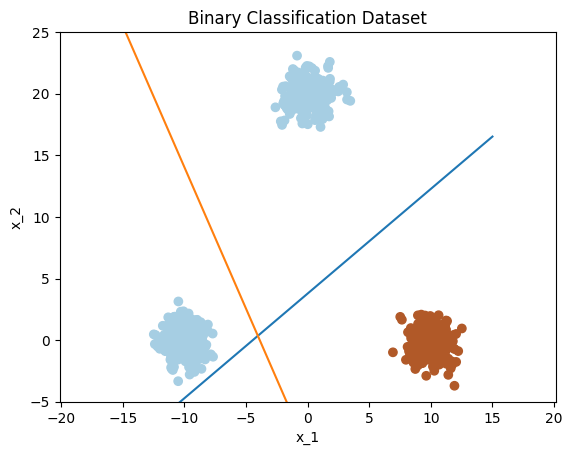

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.648055193820E+01  Residual=-.800000000000E+01
Ext.iteration=28  Objective=0.399561682837E+01  Residual=-.680573227374E+01
Start stage  1
Ext.iteration=0  Objective=0.146911618995E-12  Residual=-.680573227374E+01
Ext.iteration=31  Objective=-.500291988700E+02  Residual=0.568434188608E-13
Start stage  2
Ext.iteration=0  Objective=0.176235445298E-11  Residual=0.255795384874E-12
Ext.iteration=89  Objective=-.319265644094E+01  Residual=0.000000000000E+00
Start stage  3
Ext.iteration=0  Objective=0.183505531056E-11  Residual=-.710542735760E-14
Ext.iteration=123  Objective=-.121975704327E+00  Residual=-.488470280005E+01
Start stage  4
Ext.iteration=0  Objective=0.156234167644E-11  Residual=-.488470280005E+01
Ext.iteration=37  Objective=-.721982694867E-01  Resid

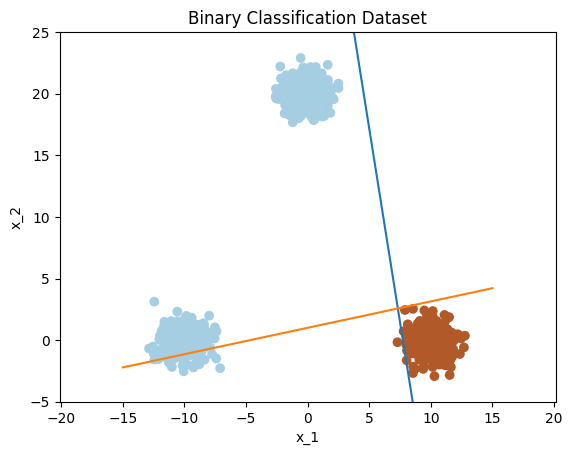

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.628593895673E+01  Residual=-.800000000000E+01
Ext.iteration=33  Objective=0.365741809684E+01  Residual=-.681755742428E+01
Start stage  1
Ext.iteration=0  Objective=0.120774098066E-12  Residual=-.681755742428E+01
Ext.iteration=30  Objective=-.473460262366E+02  Residual=-.239783653931E+03
Start stage  2
Ext.iteration=0  Objective=0.171329801342E-11  Residual=-.239783653931E+03
Ext.iteration=75  Objective=-.267098789658E+01  Residual=-.134220268023E+01
Start stage  3
Ext.iteration=0  Objective=0.155268251575E-11  Residual=-.134220268023E+01
Ext.iteration=53  Objective=-.263380990245E+00  Residual=-.172705336254E-02
Start stage  4
Ext.iteration=0  Objective=0.144736588700E-11  Residual=-.172705336254E-02
Ext.iteration=76  Objective=-.641037342469E-01  Residu

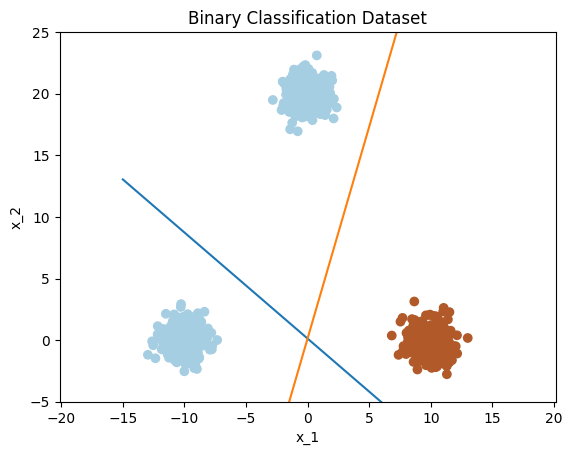

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.600890378392E+01  Residual=-.800000000000E+01
Ext.iteration=29  Objective=0.319770866897E+01  Residual=-.677852129325E+01
Start stage  1
Ext.iteration=0  Objective=0.995814308504E-13  Residual=-.677852129325E+01
Ext.iteration=32  Objective=-.352128453496E+02  Residual=-.162262537901E+03
Start stage  2
Ext.iteration=0  Objective=0.158908512199E-11  Residual=-.162262537901E+03
Ext.iteration=140  Objective=-.300004197203E+01  Residual=0.531628074896E-10
Start stage  3
Ext.iteration=0  Objective=0.157245695460E-11  Residual=0.531628074896E-10
Ext.iteration=63  Objective=-.206031106739E+00  Residual=0.371480474826E-06
Start stage  4
Ext.iteration=0  Objective=0.135684833081E-11  Residual=0.371480474826E-06
Ext.iteration=84  Objective=-.225325493398E-01  Resid

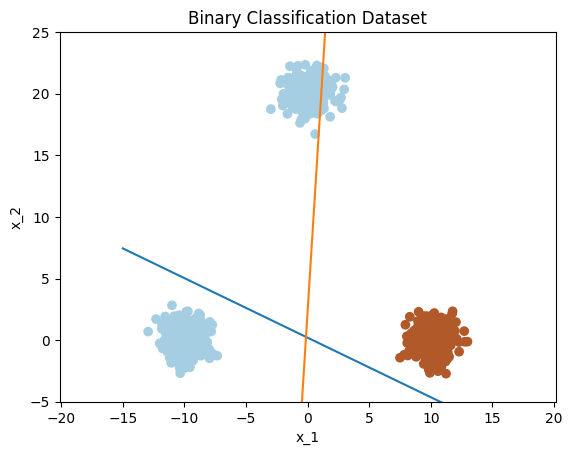

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.602581697767E+01  Residual=-.800000000000E+01
Ext.iteration=34  Objective=0.343930013752E+01  Residual=-.601704099086E+01
Start stage  1
Ext.iteration=0  Objective=0.114248241727E-12  Residual=-.601704099086E+01
Ext.iteration=28  Objective=-.370512991003E+02  Residual=-.478421819639E+00
Start stage  2
Ext.iteration=0  Objective=0.185266326626E-11  Residual=-.478421819639E+00
Ext.iteration=124  Objective=-.397327695849E+01  Residual=-.630545118583E-02
Start stage  3
Ext.iteration=0  Objective=0.173846655258E-11  Residual=-.630545118583E-02
Ext.iteration=56  Objective=-.362105416257E+00  Residual=-.427757331233E+00
Start stage  4
Ext.iteration=0  Objective=0.138946392787E-11  Residual=-.427757331233E+00
Ext.iteration=80  Objective=-.139666821976E-01  Resid

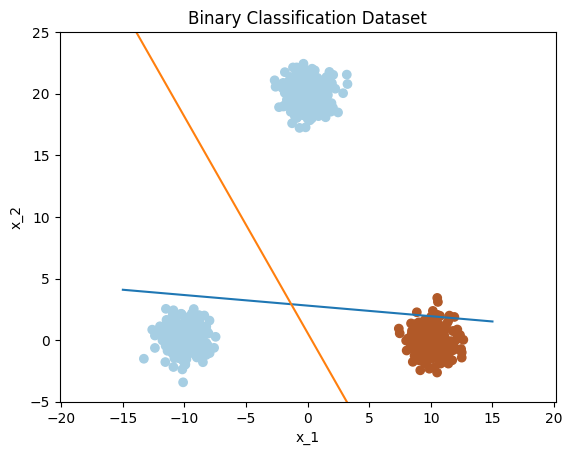

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.636657446062E+01  Residual=-.800000000000E+01
Ext.iteration=29  Objective=0.367780003149E+01  Residual=-.565348407810E+01
Start stage  1
Ext.iteration=0  Objective=0.138717579297E-12  Residual=-.565348407810E+01
Ext.iteration=48  Objective=-.484812837554E+02  Residual=-.216678761636E+03
Start stage  2
Ext.iteration=0  Objective=0.181372952154E-11  Residual=-.216678761636E+03
Ext.iteration=92  Objective=-.356004627913E+01  Residual=-.500033410180E+01
Start stage  3
Ext.iteration=0  Objective=0.146524303276E-11  Residual=-.500033410180E+01
Ext.iteration=52  Objective=-.494946423751E+00  Residual=-.698424876375E+01
Start stage  4
Ext.iteration=0  Objective=0.133440057156E-11  Residual=-.698424876375E+01
Ext.iteration=23  Objective=-.104853495644E+00  Residu

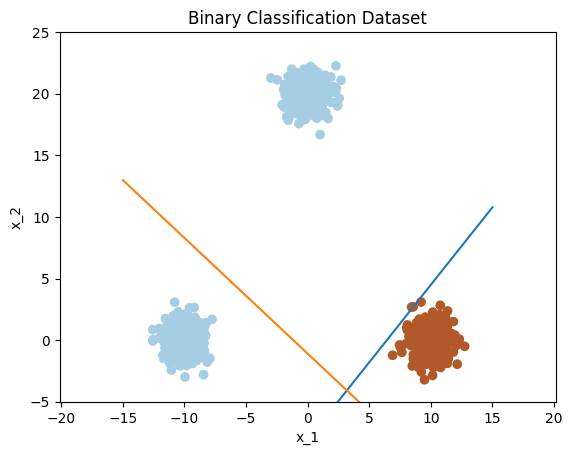

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.586406121539E+01  Residual=-.800000000000E+01
Ext.iteration=29  Objective=0.341118046770E+01  Residual=-.678744279466E+01
Start stage  1
Ext.iteration=0  Objective=0.116846950338E-12  Residual=-.678744279466E+01
Ext.iteration=47  Objective=-.338400417146E+02  Residual=-.325528318306E+03
Start stage  2
Ext.iteration=0  Objective=0.184863164578E-11  Residual=-.325528318306E+03
Ext.iteration=59  Objective=-.717668918457E+01  Residual=-.589343136208E+01
Start stage  3
Ext.iteration=0  Objective=0.134237460027E-11  Residual=-.589343136208E+01
Ext.iteration=34  Objective=-.754392450618E+00  Residual=-.917567079416E-02
Start stage  4
Ext.iteration=0  Objective=0.136527504900E-11  Residual=-.917567079416E-02
Ext.iteration=48  Objective=-.170197822982E-01  Residu

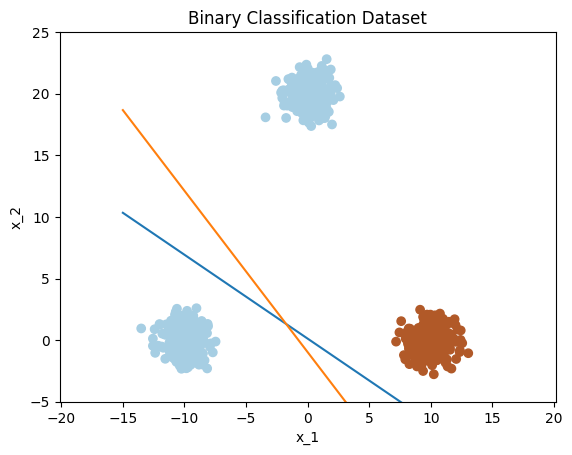

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.579692339098E+01  Residual=-.800000000000E+01
Ext.iteration=22  Objective=0.328957518313E+01  Residual=-.465165837576E+01
Start stage  1
Ext.iteration=0  Objective=0.111532225592E-12  Residual=-.465165837576E+01
Ext.iteration=54  Objective=-.319193520985E+02  Residual=-.345355599365E+03
Start stage  2
Ext.iteration=0  Objective=0.163181440672E-11  Residual=-.345355599365E+03
Ext.iteration=80  Objective=-.867872217166E+01  Residual=-.742450270951E+00
Start stage  3
Ext.iteration=0  Objective=0.172965665722E-11  Residual=-.742450270951E+00
Ext.iteration=36  Objective=-.106307565280E+01  Residual=-.358221925245E-02
Start stage  4
Ext.iteration=0  Objective=0.128131075555E-11  Residual=-.358221925245E-02
Ext.iteration=47 

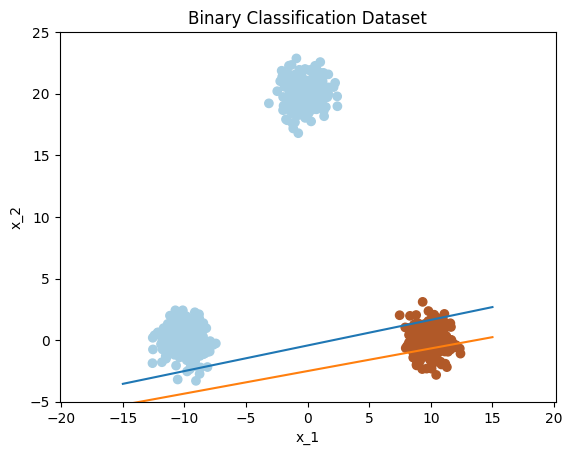

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.617099501662E+01  Residual=-.800000000000E+01
Ext.iteration=33  Objective=0.337264998174E+01  Residual=-.528765798561E+01
Start stage  1
Ext.iteration=0  Objective=0.102399879645E-12  Residual=-.528765798561E+01
Ext.iteration=69  Objective=-.323632633800E+02  Residual=-.191261466536E+03
Start stage  2
Ext.iteration=0  Objective=0.167609338060E-11  Residual=-.191261466536E+03
Ext.iteration=121  Objective=-.353765257048E+01  Residual=0.390585341847E-10
Start stage  3
Ext.iteration=0  Objective=0.169788240483E-11  Residual=0.390443233300E-10
Ext.iteration=55  Objective=-.228278191365E+00  Residual=-.151320807223E+01
Start stage  4
Ext.iteration=0  Objective=0.148484307765E-11  Residual=-.151320807223E+01
Ext.iteration=48  Objective=-.231929798222E-01  Resid

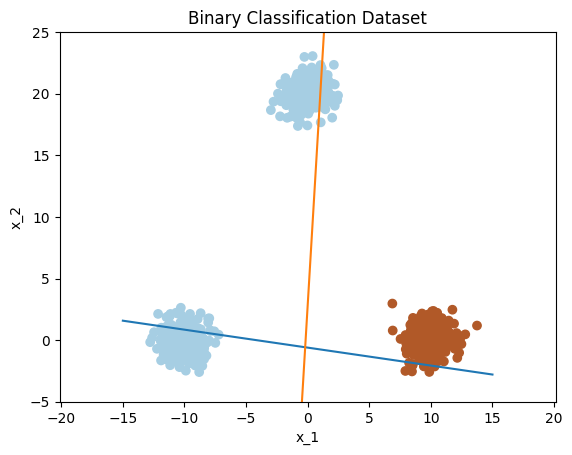

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.644214304597E+01  Residual=-.800000000000E+01
Ext.iteration=23  Objective=0.372374783503E+01  Residual=-.584632266512E+01
Start stage  1
Ext.iteration=0  Objective=0.123314506302E-12  Residual=-.584632266512E+01
Ext.iteration=42  Objective=-.477895066069E+02  Residual=-.201484334413E+03
Start stage  2
Ext.iteration=0  Objective=0.176998175641E-11  Residual=-.201484334413E+03
Ext.iteration=87  Objective=-.315916197113E+01  Residual=-.165228845841E-02
Start stage  3
Ext.iteration=0  Objective=0.152364506642E-11  Residual=-.165228845841E-02
Ext.iteration=47  Objective=-.350124214676E+00  Residual=-.168648886772E+02
Start stage  4
Ext.iteration=0  Objective=0.134654203747E-11  Residual=-.168648886772E+02
Ext.iteration=34  Objective=-.241654652139E+00  Residu

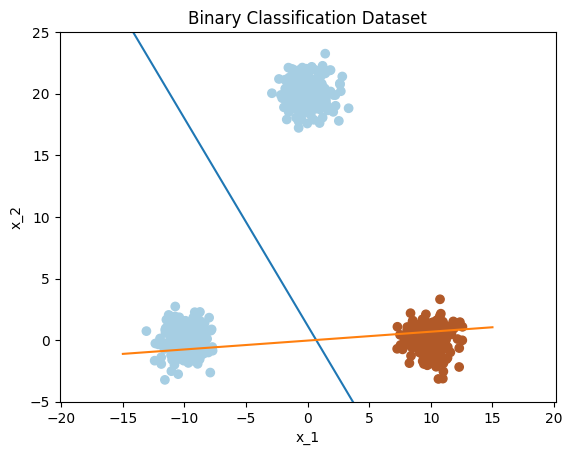

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.617871392876E+01  Residual=-.800000000000E+01
Ext.iteration=25  Objective=0.361306277239E+01  Residual=-.725341035500E+01
Start stage  1
Ext.iteration=0  Objective=0.131581749520E-12  Residual=-.725341035500E+01
Ext.iteration=45  Objective=-.475167911316E+02  Residual=0.972022462520E-11
Start stage  2
Ext.iteration=0  Objective=0.143153978587E-11  Residual=0.943600753089E-11
Ext.iteration=111  Objective=-.181655868044E+01  Residual=0.153090859101E-06
Start stage  3
Ext.iteration=0  Objective=0.169349425543E-11  Residual=0.153090887522E-06
Ext.iteration=50  Objective=-.879033790215E-01  Residual=-.741401499170E-02
Start stage  4
Ext.iteration=0  Objective=0.149586911952E-11  Residual=-.741401499170E-02
Ext.iteration=70  Objective=-.234103457912E-01  Resid

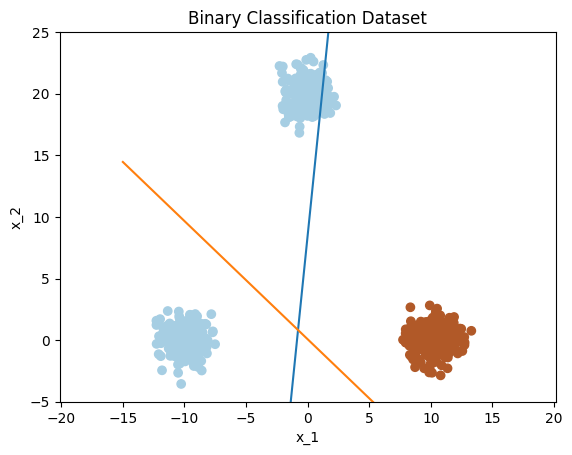

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.610307052437E+01  Residual=-.800000000000E+01
Ext.iteration=24  Objective=0.318741392336E+01  Residual=-.404092525475E+01
Start stage  1
Ext.iteration=0  Objective=0.981246966451E-13  Residual=-.404092525475E+01
Ext.iteration=48  Objective=-.271250119980E+02  Residual=-.410252794112E+02
Start stage  2
Ext.iteration=0  Objective=0.172504170872E-11  Residual=-.410252794112E+02
Ext.iteration=88  Objective=-.668365003692E+01  Residual=-.197186831524E+01
Start stage  3
Ext.iteration=0  Objective=0.150293090098E-11  Residual=-.197186831524E+01
Ext.iteration=71  Objective=-.873267093083E+00  Residual=-.719382880414E-01
Start stage  4
Ext.iteration=0  Objective=0.141913414288E-11  Residual=-.719382880414E-01
Ext.iteration=82  Objective=-.194825299888E+00  Residu

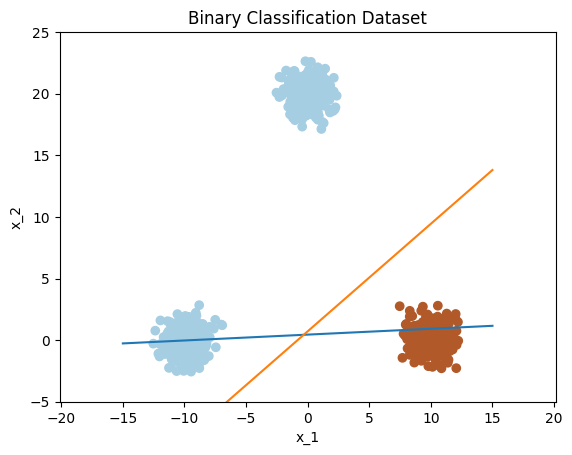

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.646236611430E+01  Residual=-.800000000000E+01
Ext.iteration=45  Objective=0.346838921420E+01  Residual=-.600103365308E+01
Start stage  1
Ext.iteration=0  Objective=0.128281535514E-12  Residual=-.600103365308E+01
Ext.iteration=48  Objective=-.448319347942E+02  Residual=-.265073715380E+03
Start stage  2
Ext.iteration=0  Objective=0.166221007875E-11  Residual=-.265073715380E+03
Ext.iteration=99  Objective=-.481969046057E+01  Residual=0.577129021906E-06
Start stage  3
Ext.iteration=0  Objective=0.170968618208E-11  Residual=0.577129050328E-06
Ext.iteration=67  Objective=-.285433751222E+00  Residual=-.161958758559E+02
Start stage  4
Ext.iteration=0  Objective=0.146225723506E-11  Residual=-.161958758559E+02
Ext.iteration=42 

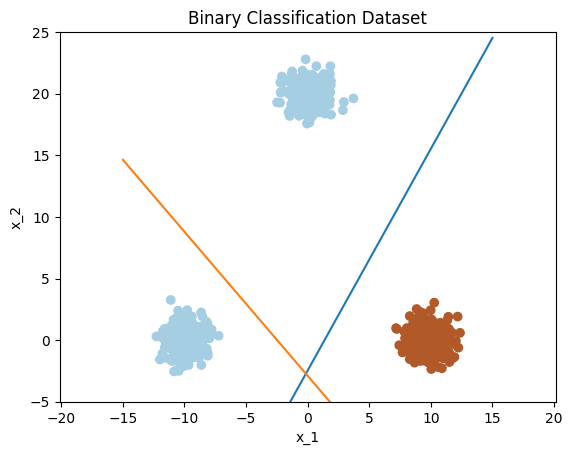

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.602008138700E+01  Residual=-.800000000000E+01
Ext.iteration=44  Objective=0.337114284411E+01  Residual=-.194442563891E+01
Start stage  1
Ext.iteration=0  Objective=0.154232180034E-12  Residual=-.194442563891E+01
Ext.iteration=35  Objective=-.473087124484E+02  Residual=-.113686837722E-12
Start stage  2
Ext.iteration=0  Objective=0.172507539495E-11  Residual=-.170530256582E-12
Ext.iteration=91  Objective=-.630326200245E+01  Residual=0.989430759546E-12
Start stage  3
Ext.iteration=0  Objective=0.190428119245E-11  Residual=0.996536186904E-12
Ext.iteration=52  Objective=-.150562786551E+00  Residual=-.309020005203E+01
Start stage  4
Ext.iteration=0  Objective=0.164080143348E-11  Residual=-.309020005203E+01
Ext.iteration=53 

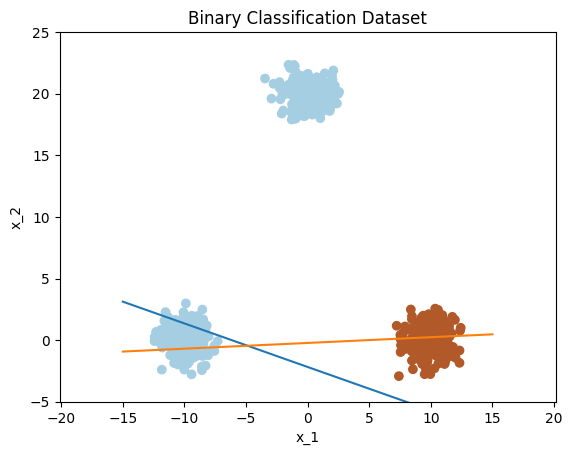

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.598453208379E+01  Residual=-.800000000000E+01
Ext.iteration=27  Objective=0.306959137150E+01  Residual=-.701321153589E+01
Start stage  1
Ext.iteration=0  Objective=0.115288276159E-12  Residual=-.701321153589E+01
Ext.iteration=39  Objective=-.392309077373E+02  Residual=0.568434188608E-13
Start stage  2
Ext.iteration=0  Objective=0.154247952667E-11  Residual=0.142108547152E-12
Ext.iteration=106  Objective=-.261760297112E+01  Residual=-.165406883233E-02
Start stage  3
Ext.iteration=0  Objective=0.126279760362E-11  Residual=-.165406883233E-02
Ext.iteration=50  Objective=-.831456974757E-01  Residual=-.100924879093E+00
Start stage  4
Ext.iteration=0  Objective=0.109976327585E-11  Residual=-.100924879093E+00
Ext.iteration=28  Objective=-.955460067175E-03  Resid

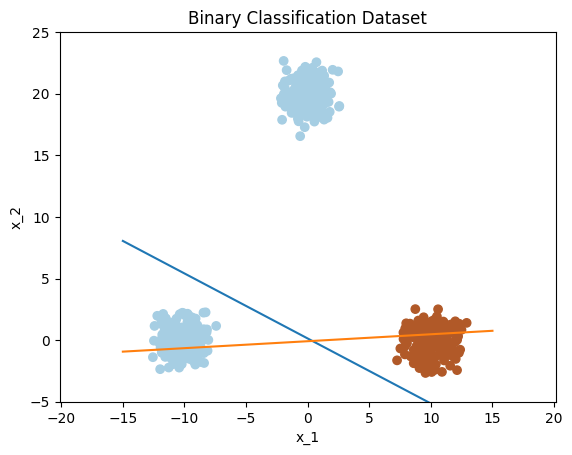

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.630598917945E+01  Residual=-.800000000000E+01
Ext.iteration=23  Objective=0.354856784950E+01  Residual=-.678119547324E+01
Start stage  1
Ext.iteration=0  Objective=0.129547282853E-12  Residual=-.678119547324E+01
Ext.iteration=38  Objective=-.436781702316E+02  Residual=-.217357286342E+03
Start stage  2
Ext.iteration=0  Objective=0.161679764714E-11  Residual=-.217357286342E+03
Ext.iteration=104  Objective=-.265860657389E+01  Residual=-.601221232851E+00
Start stage  3
Ext.iteration=0  Objective=0.134388585023E-11  Residual=-.601221232851E+00
Ext.iteration=62  Objective=-.151633436552E+00  Residual=-.883935969523E+00
Start stage  4
Ext.iteration=0  Objective=0.120245391404E-11  Residual=-.883935969523E+00
Ext.iteration=51  Objective=-.167073674159E-01  Resid

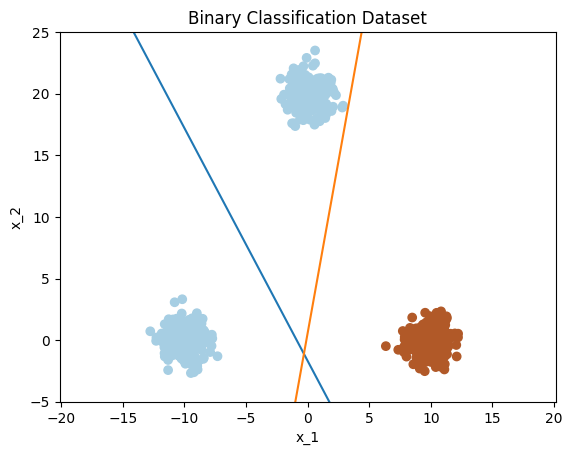

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.636755904590E+01  Residual=-.800000000000E+01
Ext.iteration=21  Objective=0.388876128250E+01  Residual=-.711393965115E+01
Start stage  1
Ext.iteration=0  Objective=0.136116431205E-12  Residual=-.711393965115E+01
Ext.iteration=46  Objective=-.522104367814E+02  Residual=-.843409836859E+02
Start stage  2
Ext.iteration=0  Objective=0.168244596102E-11  Residual=-.843409836859E+02
Ext.iteration=111  Objective=-.220646950790E+01  Residual=-.160697191895E-03
Start stage  3
Ext.iteration=0  Objective=0.176714641484E-11  Residual=-.160697191895E-03
Ext.iteration=53  Objective=-.100686844121E+00  Residual=-.129385621809E-01
Start stage  4
Ext.iteration=0  Objective=0.164285389180E-11  Residual=-.129385621809E-01
Ext.iteration=18  Objective=-.175536333186E-02  Resid

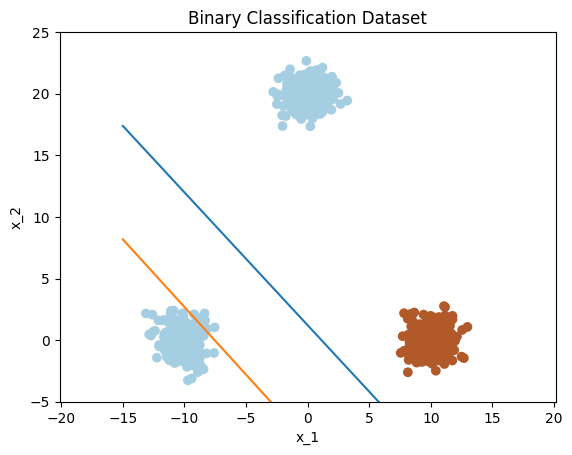

Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.621652936636E+01  Residual=-.800000000000E+01
Ext.iteration=26  Objective=0.376280088659E+01  Residual=-.557071685883E+01
Start stage  1
Ext.iteration=0  Objective=0.135036302663E-12  Residual=-.557071685883E+01
Ext.iteration=59  Objective=-.415537371912E+02  Residual=0.568434188608E-13
Start stage  2
Ext.iteration=0  Objective=0.162787001745E-11  Residual=0.227373675443E-12
Ext.iteration=67  Objective=-.439953288476E+01  Residual=-.118283436082E+01
Start stage  3
Ext.iteration=0  Objective=0.174358544071E-11  Residual=-.118283436082E+01
Ext.iteration=52  Objective=-.430157571840E+00  Residual=-.419532747902E+01
Start stage  4
Ext.iteration=0  Objective=0.136270547929E-11  Residual=-.419532747902E+01
Ext.iteration=45 

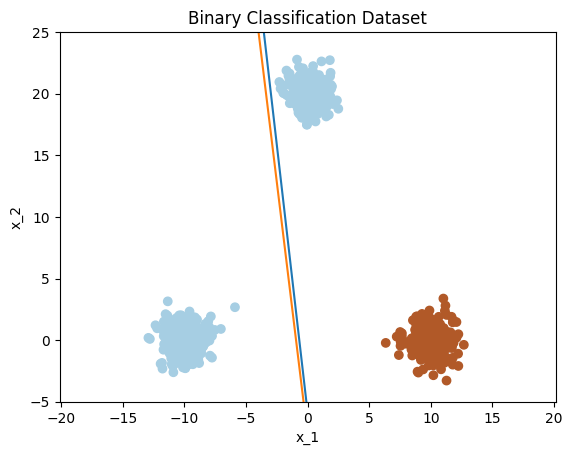

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.664177539565E+01  Residual=-.800000000000E+01
Ext.iteration=32  Objective=0.387026630193E+01  Residual=-.462283955847E+01
Start stage  1
Ext.iteration=0  Objective=0.142725305629E-12  Residual=-.462283955847E+01
Ext.iteration=24  Objective=-.473180820027E+02  Residual=-.144176329901E+03
Start stage  2
Ext.iteration=0  Objective=0.175080296505E-11  Residual=-.144176329901E+03
Ext.iteration=94  Objective=-.532591659073E+01  Residual=-.930529915357E-01
Start stage  3
Ext.iteration=0  Objective=0.169151907957E-11  Residual=-.930529915357E-01
Ext.iteration=46  Objective=-.587681365090E+00  Residual=-.163370326671E-03
Start stage  4
Ext.iteration=0  Objective=0.131857736310E-11  Residual=-.163370326671E-03
Ext.iteration=66  Objective=-.197020119600E-01  Residu

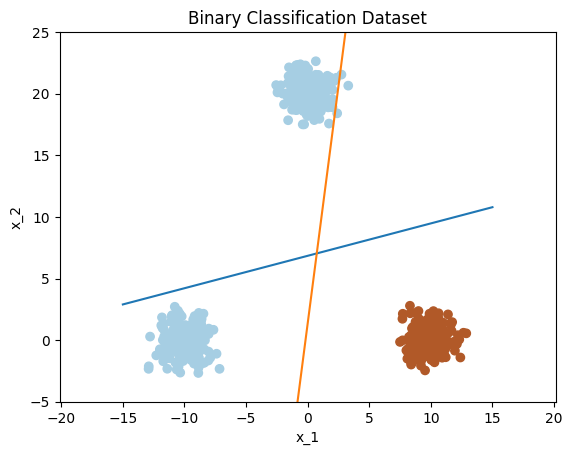

Running solver
Reading problem formulation
Asking for data information
Getting data
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.579075716845E+01  Residual=-.800000000000E+01
Ext.iteration=28  Objective=0.348909782947E+01  Residual=-.500997837374E+01
Start stage  1
Ext.iteration=0  Objective=0.120250947702E-12  Residual=-.500997837374E+01
Ext.iteration=49  Objective=-.349571039883E+02  Residual=0.568434188608E-13
Start stage  2
Ext.iteration=0  Objective=0.179785600810E-11  Residual=-.170530256582E-12
Ext.iteration=131  Objective=-.720600628986E+01  Residual=-.648618264911E-04
Start stage  3
Ext.iteration=0  Objective=0.180893319247E-11  Residual=-.648618264911E-04
Ext.iteration=38  Objective=-.480242555877E+00  Residual=-.919486497146E+01
Start stage  4
Ext.iteration=0  Objective=0.168931948877E-11  Residual=-.919486497146E+01
Ext.iteration=63  Objective=-.254410559287E+00  Resid

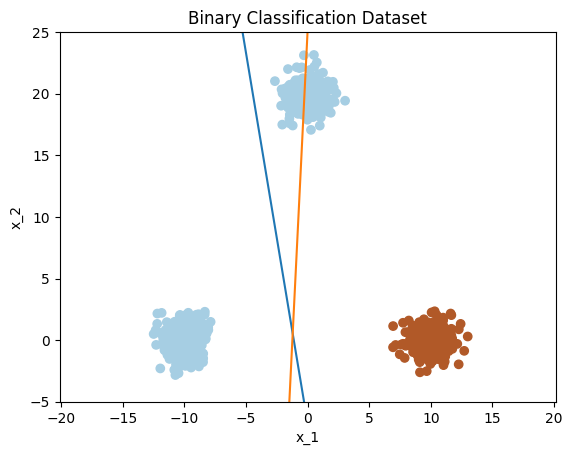

In [7]:
for i in range(100):
  p_tilda, p_star, w_tilda, w_star, a_tilda, a_star, X, y = driver()
  f1 = lambda x: (w_star[2] - w_star[0]*x)/w_star[1]
  f2 = lambda x: (w_star[5] - w_star[3]*x)/w_star[4]
  x_vals = np.linspace(-15, 15, 20)
  y1_vals = f1(x_vals)
  y2_vals = f2(x_vals)
  plt.scatter(X[0][:, 0], X[0][:, 1], c=y[0], cmap=plt.cm.Paired)
  plt.plot(x_vals, y1_vals)
  plt.plot(x_vals, y2_vals)
  plt.xlabel('x_1')
  plt.ylabel('x_2')
  plt.title('Binary Classification Dataset')
  plt.axis('equal')
  plt.xlim(-10, 10)
  plt.ylim(-5, 25)
  plt.show()